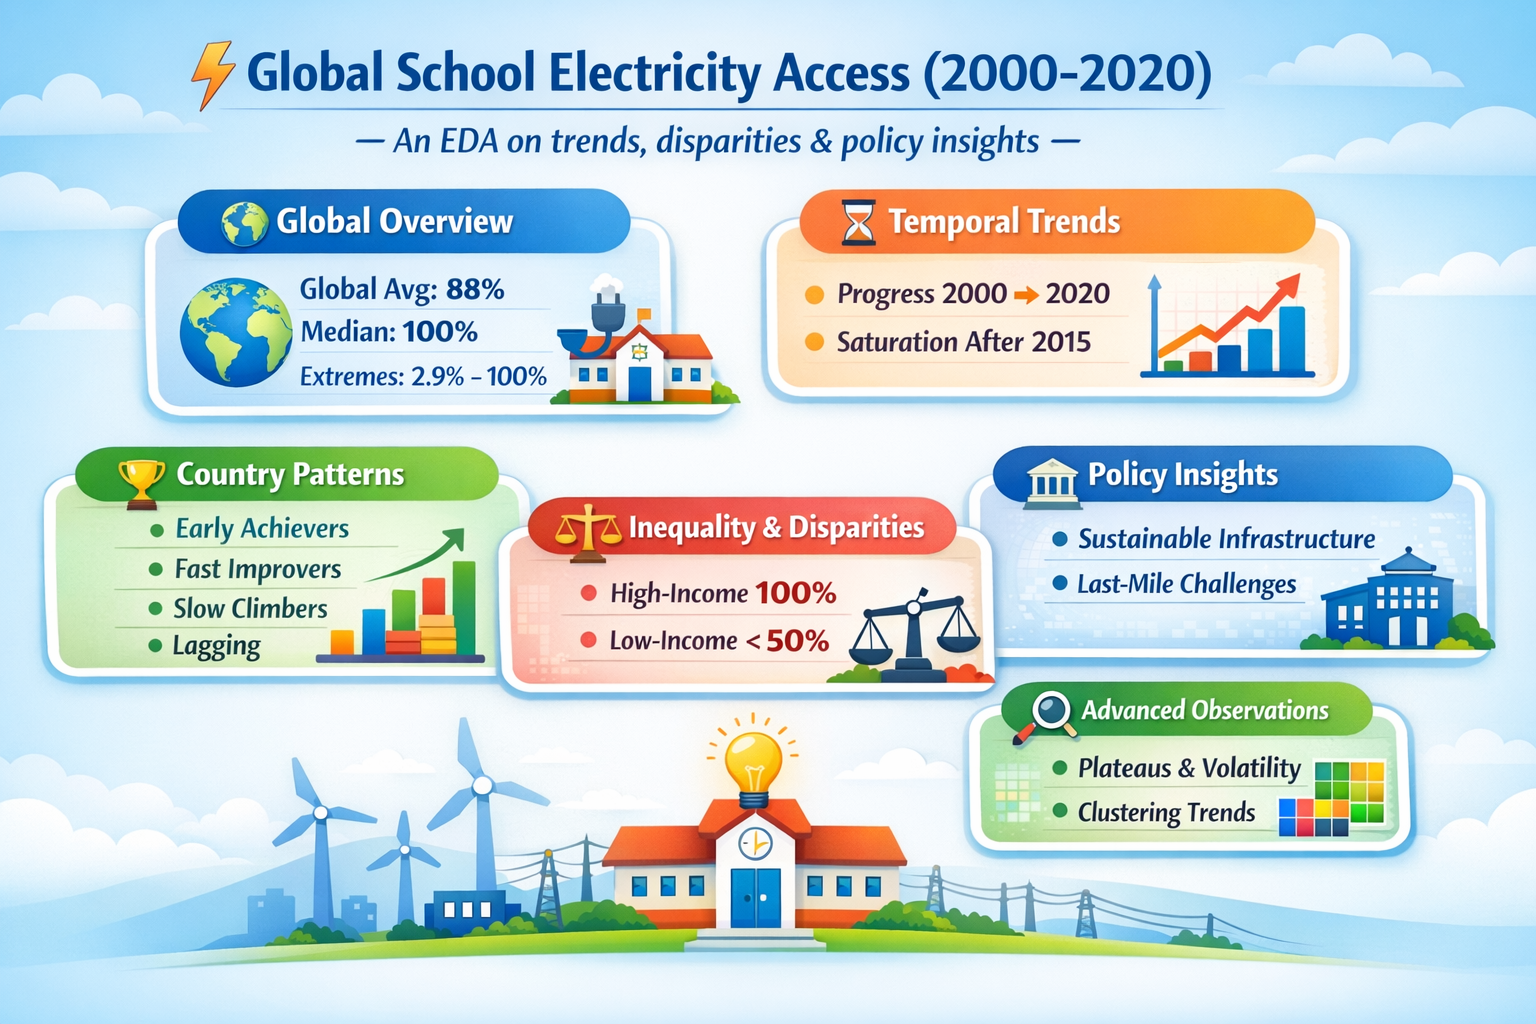

In [1]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/school-electricity-thumbnail/school_thumbnail.png'))

<div style="background-color:#f0f8ff; border-left:6px solid #1e90ff; padding:20px; border-radius:10px;">
  
  <h1 style="color:#1e90ff; font-family:Arial, sans-serif; margin-bottom:10px;">
    <b>⚡ Global School Electricity Access Analysis (2000-2020)</b>
  </h1>
  
  <hr style="border:1px solid #1e90ff; margin-bottom:15px;">
  
  <h2 style="color:#1e90ff; font-family:Arial, sans-serif; margin-bottom:10px;">
    <b>🌍 Introduction</b>
  </h2>
  
  <p style="font-size:14px; color:#333333; font-family:Verdana, sans-serif; line-height:1.6;">
    Access to electricity in schools is a <b>critical indicator of educational infrastructure and development</b>.  
    This dataset captures <b>electricity access percentages for schools in 675 country-year observations spanning 2000–2020</b>, providing insights into <b>global progress, inequalities, and policy impact</b>.
  </p>
  
  <p style="font-size:14px; color:#333333; font-family:Verdana, sans-serif; line-height:1.6;">
    Electricity access in schools directly impacts:
  </p>
  
  <p style="font-size:14px; color:#333333; font-family:Verdana, sans-serif; line-height:1.6;">
    📚 <b>Quality of Education</b> – Enables digital learning and modern teaching tools.<br>
    🏫 <b>Infrastructure Sustainability</b> – Reflects investments in reliable energy systems.<br>
    🌱 <b>Development & Equity</b> – Highlights disparities between high-income and low-income or fragile states.
  </p>
  
  <p style="font-size:14px; color:#333333; font-family:Verdana, sans-serif; line-height:1.6;">
    This notebook aims to perform a <b>comprehensive, story-driven Exploratory Data Analysis (EDA)</b> with the following objectives:
  </p>
  
  <p style="font-size:14px; color:#333333; font-family:Verdana, sans-serif; line-height:1.6;">
    📊 <b>Global Overview</b> – Understand overall access trends and extremes.<br>
    ⏳ <b>Temporal Trends</b> – Examine progress and saturation over 21 years.<br>
    🏆 <b>Country-Level Patterns</b> – Identify Early Achievers, Fast Improvers, Slow Climbers, and Stagnant/Lagging countries.<br>
    ⚖️ <b>Inequality & Disparities</b> – Highlight gaps between high-performing and low-access countries.<br>
    🏛️ <b>Policy & Development Insights</b> – Identify sustainable successes and areas needing aid.<br>
    🔍 <b>Advanced Observations</b> – Detect plateaus, volatility, and potential for clustering or change-point modeling.
  </p>
  
  <p style="font-size:14px; color:#333333; font-family:Verdana, sans-serif; line-height:1.6;">
    💡 <b>Note:</b> This EDA emphasizes <b>clarity, actionable insights, and elegant visualizations</b> to tell a compelling story for policymakers, educators, and data enthusiasts alike.
  </p>
  
  <hr style="border:1px solid #1e90ff; margin-top:15px; margin-bottom:15px;">
  
  <p style="font-size:14px; color:#333333; font-family:Verdana, sans-serif; line-height:1.6;">
    Let's dive in and explore the <b>global landscape of school electrification over the last two decades!</b> ⚡
  </p>
  
</div>

<div style="background-color:#f0f8ff; border-left:6px solid #1e90ff; padding:15px; border-radius:8px;">
  <h2 style="color:#1e90ff; font-family:Arial, sans-serif;">
    <b>🛠️ Importing Libraries</b>
  </h2>
  <p style="font-size:14px; color:#333333; font-family:Verdana, sans-serif;">
    In this section, we import all necessary Python libraries for data analysis, visualization, and manipulation:
  </p>
</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, HTML
import warnings

<div style="background-color:#f0f8ff; border-left:6px solid #1e90ff; padding:15px; border-radius:8px;">
  <h2 style="color:#1e90ff; font-family:Arial, sans-serif;">
    <b>⚙️ Basic Important Settings</b>
  </h2>
  <p style="font-size:14px; color:#333333; font-family:Verdana, sans-serif;">
    Before we start the analysis, we set up some <b>important configurations</b> to ensure:
  </p>
</div>


In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style('whitegrid') 

<div style="background-color:#f0f8ff; border-left:6px solid #1e90ff; padding:15px; border-radius:8px;">
  <h2 style="color:#1e90ff; font-family:Arial, sans-serif;">
    <b>📂 Importing Dataset</b>
  </h2>
  <p style="font-size:14px; color:#333333; font-family:Verdana, sans-serif;">
    In this step, we load the <b>Global School Electricity Access dataset (2000-2020)</b> into a pandas DataFrame for analysis. 
  </p>
</div>


In [4]:
df = pd.read_csv("/kaggle/input/global-school-electricity-access/school_electricity_access.csv")

<div style="background-color:#f0f8ff; border-left:6px solid #1e90ff; padding:15px; border-radius:8px;">
  <h2 style="color:#1e90ff; font-family:Arial, sans-serif;">
    <b>💡 Dataset Overview</b>
  </h2>
  <p style="font-size:14px; color:#333333; font-family:Verdana, sans-serif;">
    The dataset provides a comprehensive view of school electricity access across 675 observations spanning the years 2000 to 2020.  
  </p>
</div>

## 📝 Dataset Overview Story

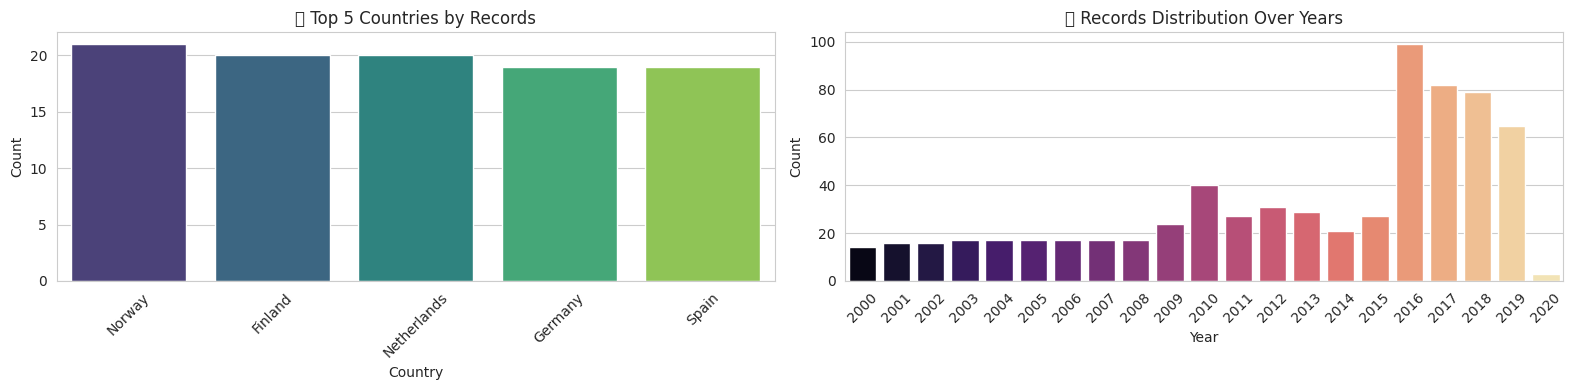

### 🔗 Correlation Between Numerical Features

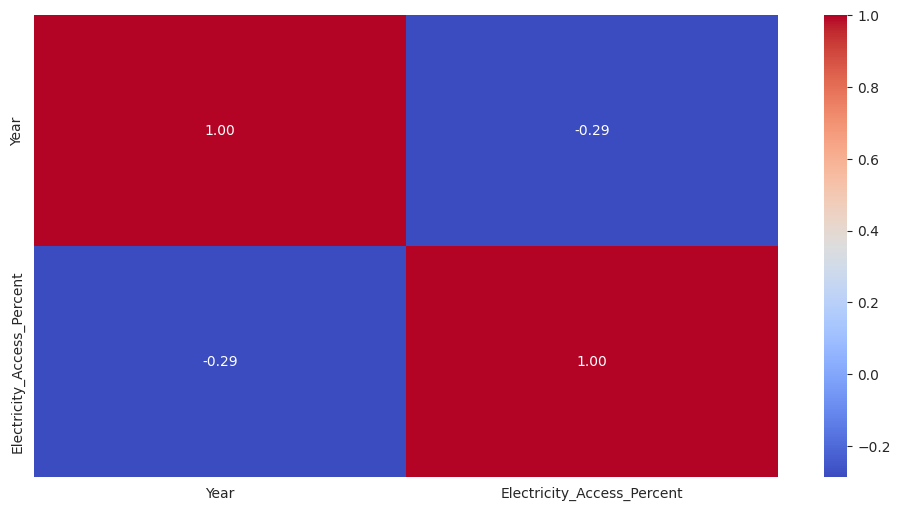

💡 **Insight:** This dataset covers multiple countries over years. Observe trends in top countries and yearly records. Use the correlation heatmap to explore relationships between numerical features.

In [5]:
# -------- HEADER --------
display(Markdown("## 📝 Dataset Overview Story"))

# -------- Quick Stats in 2 Columns --------
total_records = df.shape[0]
total_countries = df['Country_Name'].nunique()
years_covered = (df['Year'].min(), df['Year'].max())
missing = df.isnull().sum().sum()

html_stats = f"""
<div style="display:flex; justify-content:space-between; font-size:16px;">
    <div style="background:black; padding:10px; border-radius:8px; flex:1; margin-right:10px;">
        <b>📌 Total Records:</b> {total_records}<br>
        <b>🌍 Total Countries:</b> {total_countries}
    </div>
    <div style="background:black; padding:10px; border-radius:8px; flex:1; margin-left:10px;">
        <b>📅 Years Covered:</b> {years_covered[0]} - {years_covered[1]}<br>
        <b>⚠️ Missing Values:</b> {missing}
    </div>
</div>
"""
display(HTML(html_stats))

# -------- Top Countries & Year Distribution Side by Side --------
top_countries = df['Country_Name'].value_counts().head()
year_dist = df['Year'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(16,4))

# Top countries bar
sns.barplot(x=top_countries.index, y=top_countries.values, ax=axes[0], palette="viridis")
axes[0].set_title("🏆 Top 5 Countries by Records")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Country")
axes[0].tick_params(axis='x', rotation=45)

# Year distribution bar
sns.barplot(x=year_dist.index, y=year_dist.values, ax=axes[1], palette="magma")
axes[1].set_title("📈 Records Distribution Over Years")
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Year")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# -------- Sample Data & Summary Statistics Side by Side --------
sample_data = df.sample(5)
summary_stats = df.describe()

html_side = f"""
<div style="display:flex; justify-content:space-between;">
    <div style="flex:1; margin-right:10px;">
        <h4>👀 Random Sample Data</h4>
        {sample_data.to_html(index=False)}
    </div>
    <div style="flex:1; margin-left:10px;">
        <h4>📊 Summary Statistics</h4>
        {summary_stats.to_html()}
    </div>
</div>
"""
display(HTML(html_side))

# -------- Correlation Heatmap --------
numeric_cols = df.select_dtypes(include='number').columns
if len(numeric_cols) > 1:
    display(Markdown("### 🔗 Correlation Between Numerical Features"))
    plt.figure(figsize=(12,6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()

# -------- End Note --------
display(Markdown("💡 **Insight:** This dataset covers multiple countries over years. Observe trends in top countries and yearly records. Use the correlation heatmap to explore relationships between numerical features."))


<div style="background-color:#f0f8ff; border-left:6px solid #1e90ff; padding:15px; border-radius:8px;">
  <h2 style="color:#1e90ff; font-family:Arial, sans-serif;">
    <b>1️⃣ Global Overview</b>
  </h2>
</div>

### **1️⃣ Distribution of Electricity Access Across All Observations**

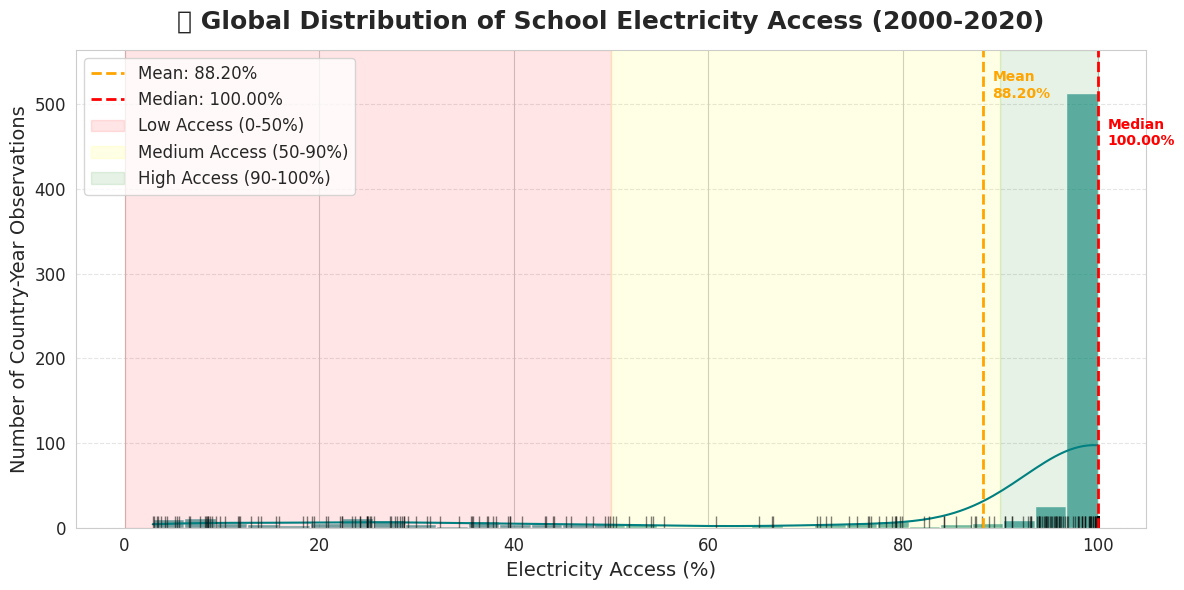

In [6]:
plt.figure(figsize=(12,6))

# Histogram with KDE
sns.histplot(
    df['Electricity_Access_Percent'], 
    bins=30, 
    kde=True, 
    color='teal',
    alpha=0.6
)

# Rugplot to show individual points
sns.rugplot(
    df['Electricity_Access_Percent'], 
    color='black', 
    alpha=0.5
)

# Mean and median lines
mean_val = df['Electricity_Access_Percent'].mean()
median_val = df['Electricity_Access_Percent'].median()

plt.axvline(mean_val, color='orange', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}%")
plt.axvline(median_val, color='red', linestyle='--', linewidth=2, label=f"Median: {median_val:.2f}%")

# Annotate mean and median
plt.text(mean_val+1, plt.gca().get_ylim()[1]*0.9, f"Mean\n{mean_val:.2f}%", color='orange', weight='bold')
plt.text(median_val+1, plt.gca().get_ylim()[1]*0.8, f"Median\n{median_val:.2f}%", color='red', weight='bold')

# Optional: highlight ranges (low/medium/high electricity access)
plt.axvspan(0, 50, color='red', alpha=0.1, label='Low Access (0-50%)')
plt.axvspan(50, 90, color='yellow', alpha=0.1, label='Medium Access (50-90%)')
plt.axvspan(90, 100, color='green', alpha=0.1, label='High Access (90-100%)')

# Titles and labels
plt.title('🌍 Global Distribution of School Electricity Access (2000-2020)', fontsize=18, weight='bold', pad=15)
plt.xlabel('Electricity Access (%)', fontsize=14)
plt.ylabel('Number of Country-Year Observations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legend
plt.legend(loc='upper left', fontsize=12)

# Grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### **2️⃣ Boxplot by Year**

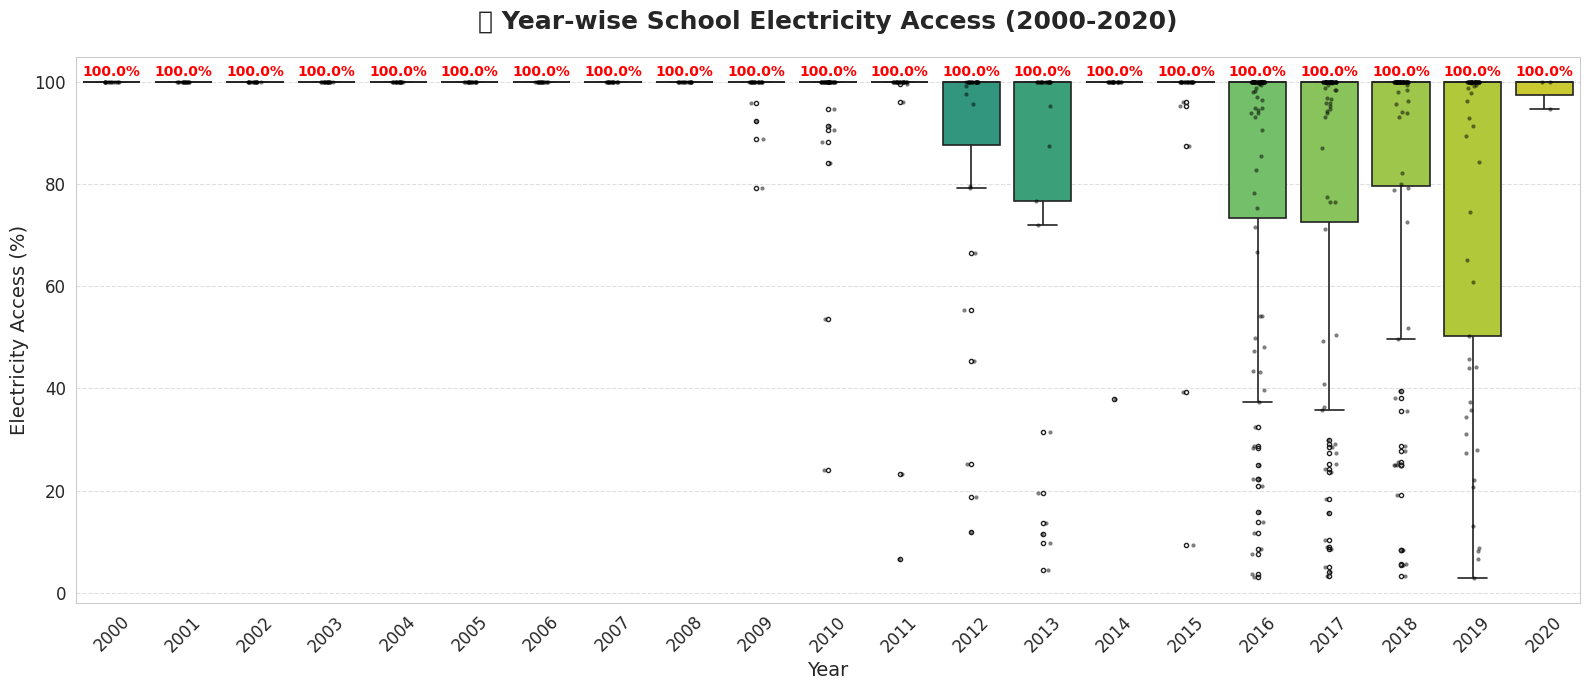

In [7]:
plt.figure(figsize=(16,7))

# Boxplot with palette and fliers style
sns.boxplot(
    x='Year', 
    y='Electricity_Access_Percent', 
    data=df, 
    palette='viridis',
    fliersize=3,  # smaller outliers
    linewidth=1.2
)

# Add stripplot on top to show individual points
sns.stripplot(
    x='Year', 
    y='Electricity_Access_Percent', 
    data=df, 
    color='black', 
    size=3, 
    jitter=True, 
    alpha=0.5
)

# Title and labels with styling
plt.title('📊 Year-wise School Electricity Access (2000-2020)', fontsize=18, weight='bold', pad=20)
plt.ylabel('Electricity Access (%)', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Rotate x-ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Highlight median line
for i, year in enumerate(sorted(df['Year'].unique())):
    median_val = df[df['Year'] == year]['Electricity_Access_Percent'].median()
    plt.text(i, median_val+1, f'{median_val:.1f}%', ha='center', color='red', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

### **3️⃣ Global Average Electricity Access Over Time**

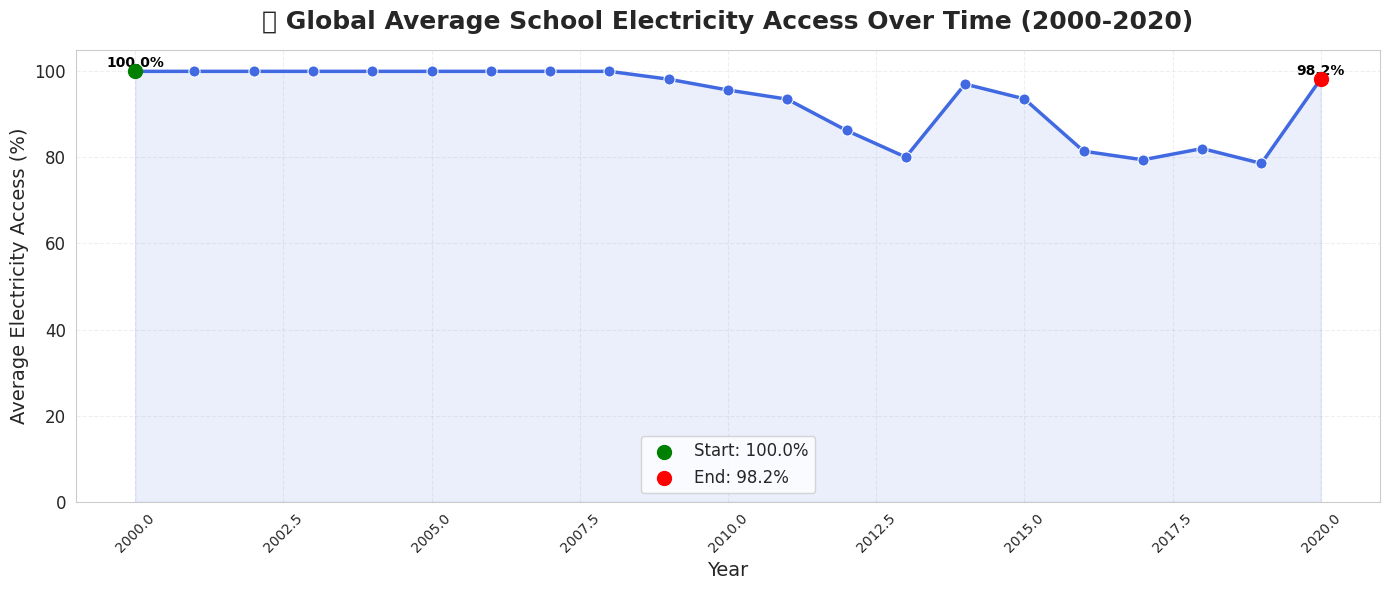

In [8]:
df_yearly = df.groupby('Year')['Electricity_Access_Percent'].mean().reset_index()

plt.figure(figsize=(14,6))

# Line with markers
sns.lineplot(
    x='Year', 
    y='Electricity_Access_Percent', 
    data=df_yearly, 
    marker='o', 
    color='royalblue', 
    linewidth=2.5,
    markersize=8
)

# Shade area under the line
plt.fill_between(df_yearly['Year'], df_yearly['Electricity_Access_Percent'], color='royalblue', alpha=0.1)

# Highlight first and last points
plt.scatter(df_yearly['Year'].iloc[0], df_yearly['Electricity_Access_Percent'].iloc[0], color='green', s=100, zorder=5, label=f"Start: {df_yearly['Electricity_Access_Percent'].iloc[0]:.1f}%")
plt.scatter(df_yearly['Year'].iloc[-1], df_yearly['Electricity_Access_Percent'].iloc[-1], color='red', s=100, zorder=5, label=f"End: {df_yearly['Electricity_Access_Percent'].iloc[-1]:.1f}%")

# Annotate key points
for i in [0, -1]:
    plt.text(df_yearly['Year'].iloc[i], df_yearly['Electricity_Access_Percent'].iloc[i]+1,
             f"{df_yearly['Electricity_Access_Percent'].iloc[i]:.1f}%", 
             color='black', weight='bold', ha='center')

# Titles and labels
plt.title('🌍 Global Average School Electricity Access Over Time (2000-2020)', fontsize=18, weight='bold', pad=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Electricity Access (%)', fontsize=14)

# Limits and grid
plt.ylim(0, 105)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.yticks(fontsize=12)

# Legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

<div style="background-color:#f0f8ff; border-left:6px solid #1e90ff; padding:15px; border-radius:8px;">
  <h2 style="color:#1e90ff; font-family:Arial, sans-serif;">
    <b>2️⃣ Temporal Trends</b>
  </h2>
</div>

### **1️⃣ Line Plot: Electricity Access for Selected Countries**

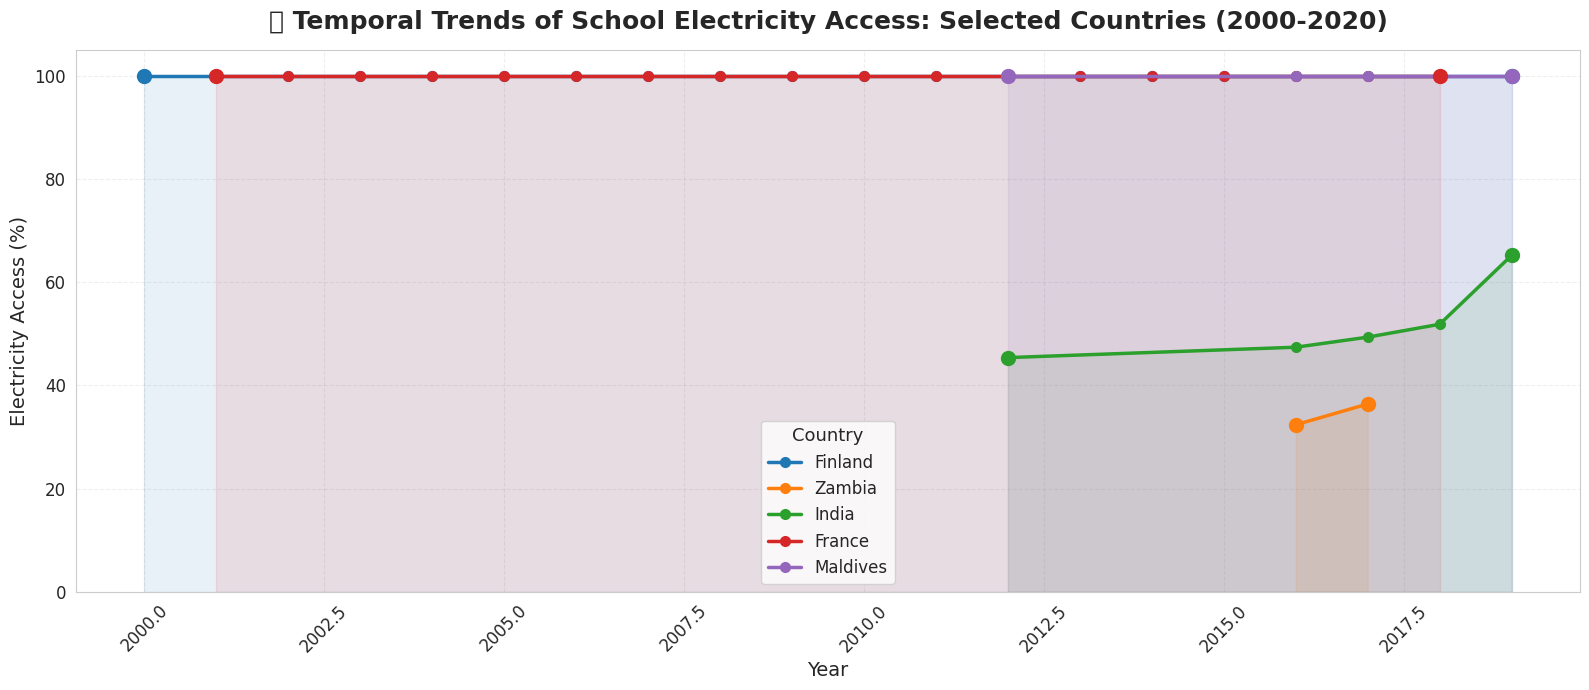

In [9]:
selected_countries = ['Finland','Zambia','India','France','Maldives']
palette = sns.color_palette('tab10', n_colors=len(selected_countries))

plt.figure(figsize=(16,7))

for i, country in enumerate(selected_countries):
    country_data = df[df['Country_Name'] == country]
    plt.plot(
        country_data['Year'], 
        country_data['Electricity_Access_Percent'], 
        marker='o', 
        linewidth=2.5, 
        markersize=7, 
        label=country,
        color=palette[i]
    )
    # Shade under the line lightly
    plt.fill_between(
        country_data['Year'], 
        country_data['Electricity_Access_Percent'], 
        alpha=0.1, 
        color=palette[i]
    )
    # Highlight first and last points
    plt.scatter(country_data['Year'].iloc[0], country_data['Electricity_Access_Percent'].iloc[0], 
                color=palette[i], s=100, zorder=5)
    plt.scatter(country_data['Year'].iloc[-1], country_data['Electricity_Access_Percent'].iloc[-1], 
                color=palette[i], s=100, zorder=5)

plt.title('🌍 Temporal Trends of School Electricity Access: Selected Countries (2000-2020)', 
          fontsize=18, weight='bold', pad=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Electricity Access (%)', fontsize=14)
plt.ylim(0, 105)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Country', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

### **2️⃣ Heatmap: Country vs Year**

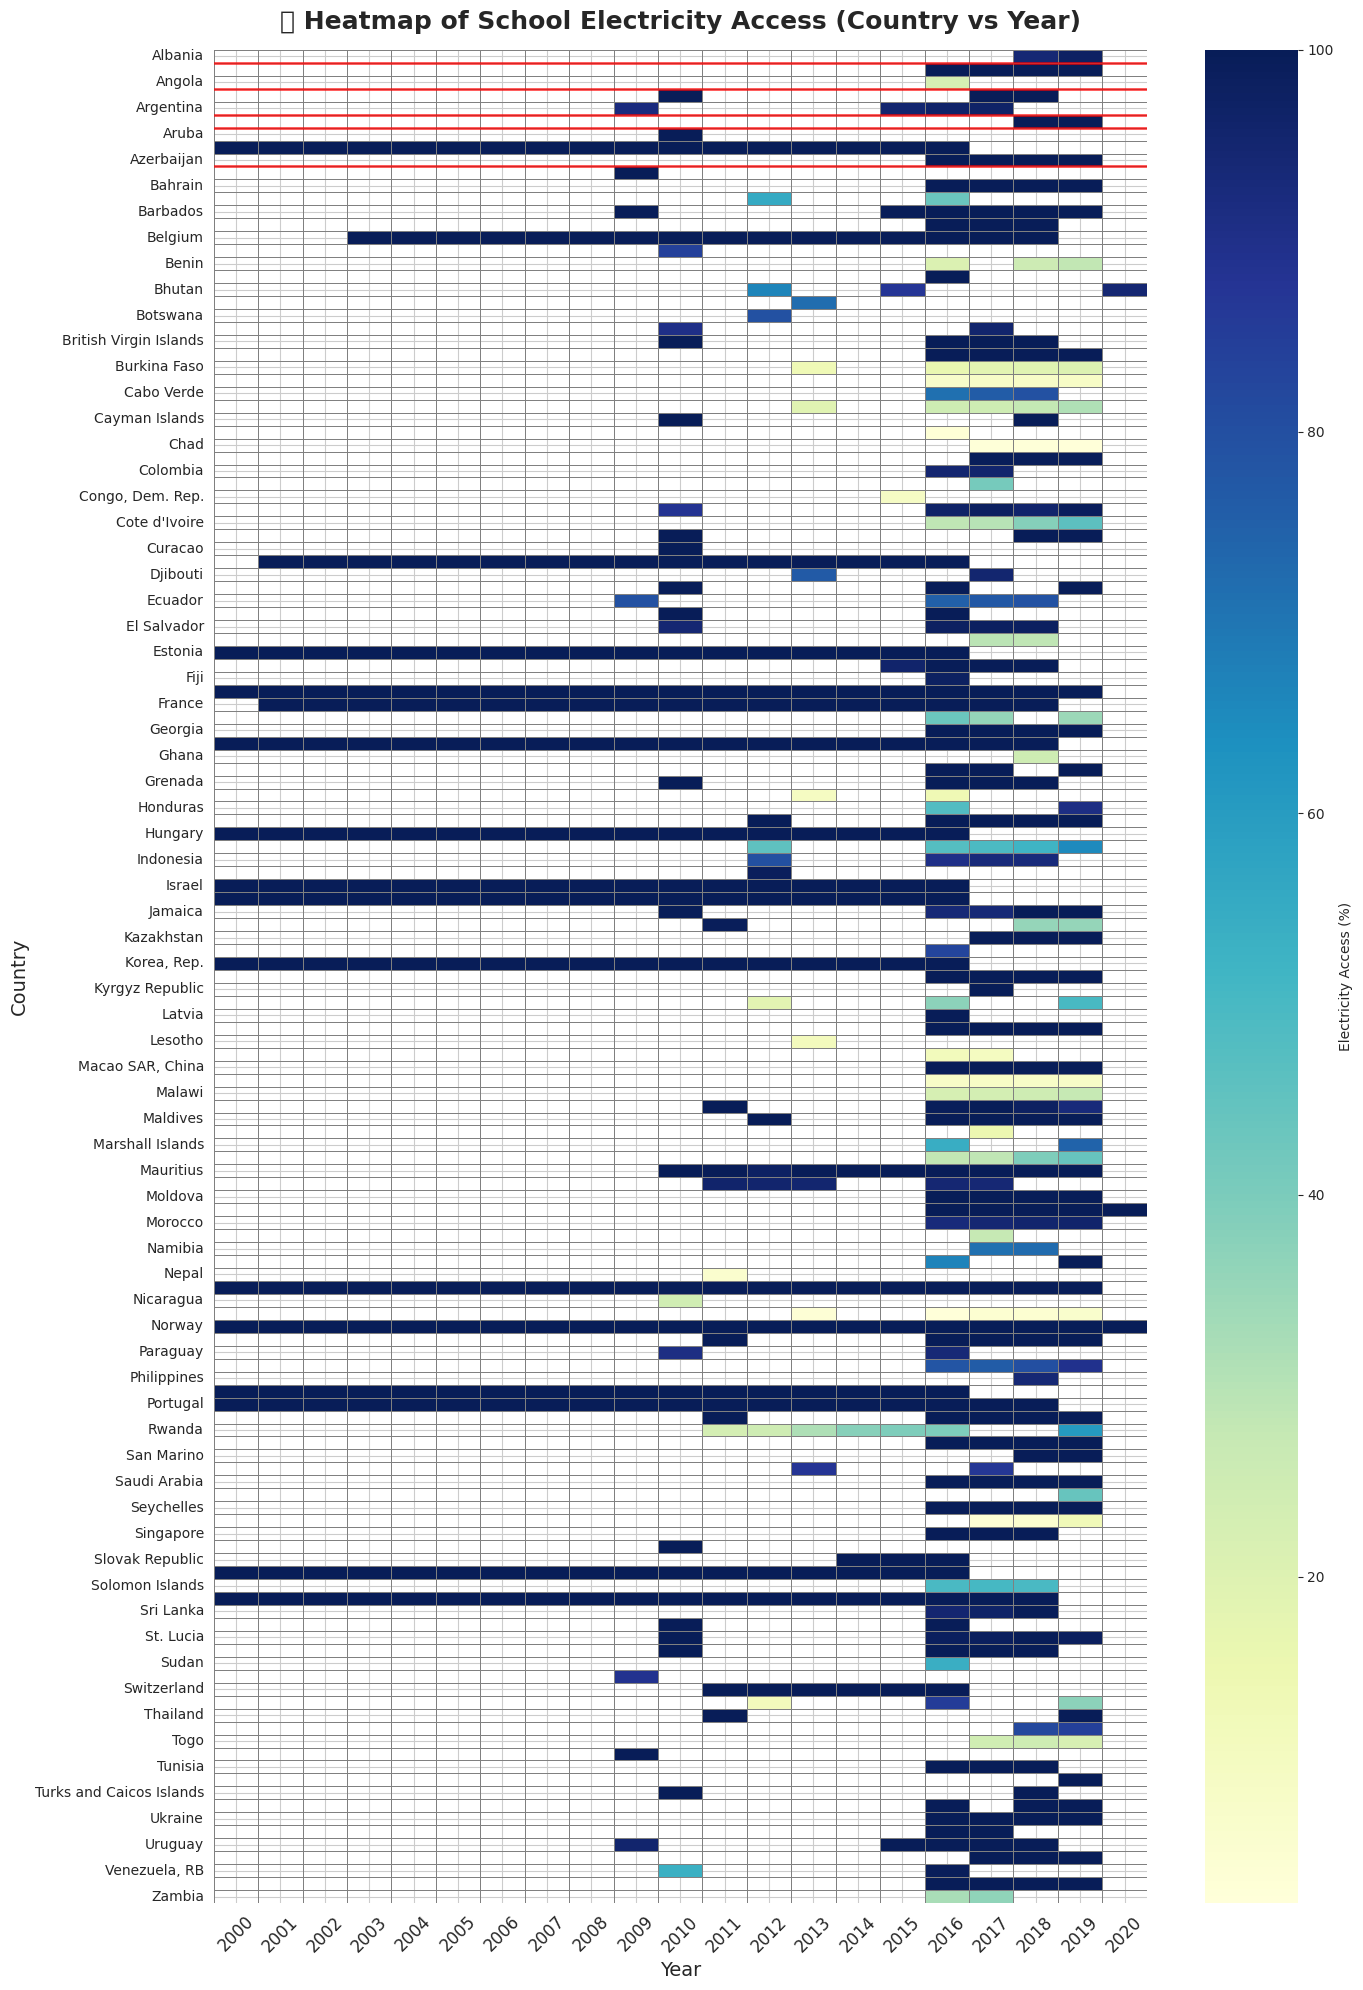

In [10]:
# Pivot table: Countries as rows, Years as columns
pivot_df = df.pivot(index='Country_Name', columns='Year', values='Electricity_Access_Percent')

plt.figure(figsize=(14,20))

# Heatmap with nicer color palette, annotations, and formatting
sns.heatmap(
    pivot_df, 
    cmap='YlGnBu',            # sequential color palette
    linewidths=0.5,           # separates cells
    linecolor='gray',
    cbar_kws={'label': 'Electricity Access (%)'},
    annot=False,              # set True if you want small numbers in each cell
    fmt=".1f"
)

# Titles and labels
plt.title('🌍 Heatmap of School Electricity Access (Country vs Year)', fontsize=18, weight='bold', pad=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Axes formatting
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=10)

# Optional: highlight top 5 countries with highest average access
top_countries = pivot_df.mean(axis=1).sort_values(ascending=False).head(5).index
for country in top_countries:
    idx = list(pivot_df.index).index(country)
    plt.axhline(idx, color='red', linewidth=2, alpha=0.7)

plt.tight_layout()
plt.show()

### **3️⃣ Boxplot: Year-wise Variability**

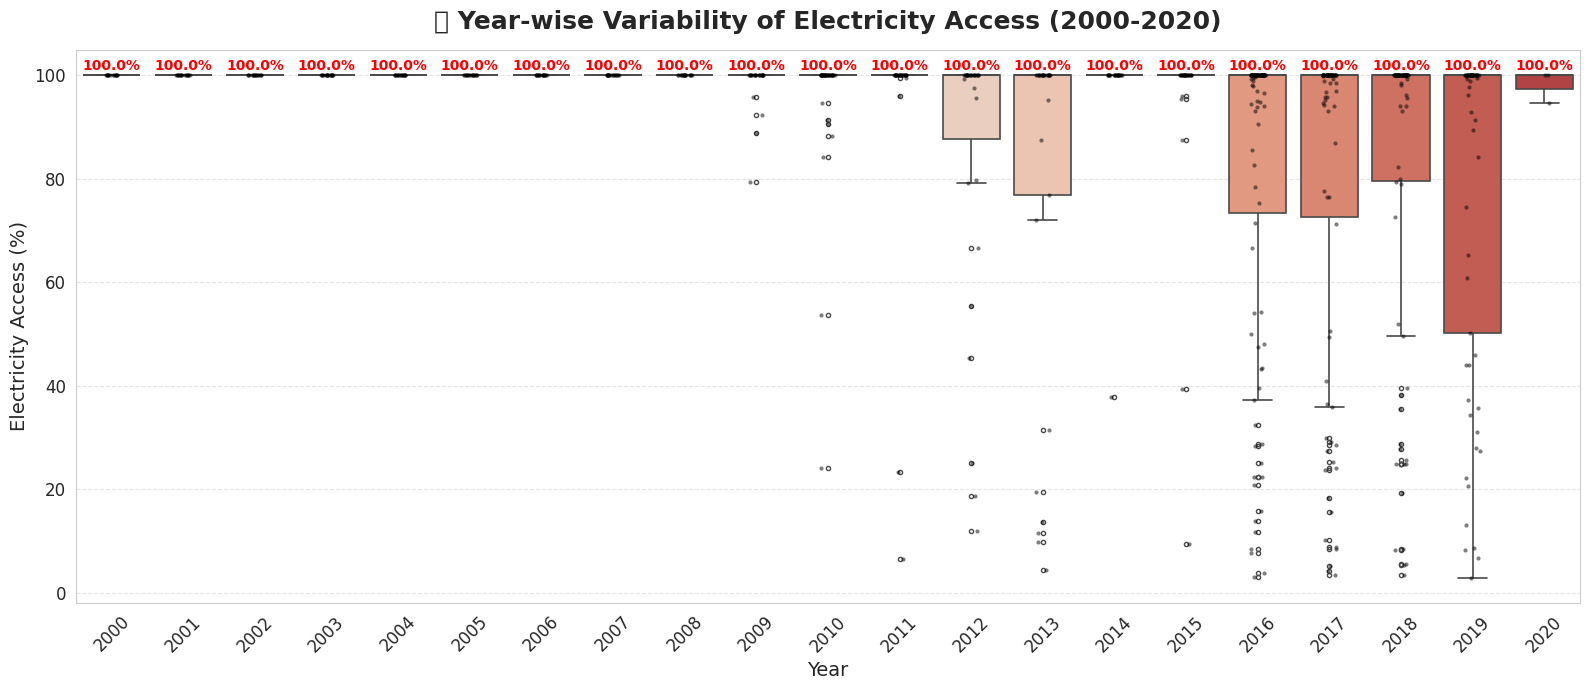

In [11]:
plt.figure(figsize=(16,7))

# Boxplot
sns.boxplot(
    x='Year', 
    y='Electricity_Access_Percent', 
    data=df, 
    palette='coolwarm',
    fliersize=3,      # smaller outliers
    linewidth=1.2
)

# Overlay individual points
sns.stripplot(
    x='Year', 
    y='Electricity_Access_Percent', 
    data=df, 
    color='black', 
    size=3, 
    jitter=True, 
    alpha=0.5
)

# Highlight median
medians = df.groupby('Year')['Electricity_Access_Percent'].median()
for i, median in enumerate(medians):
    plt.text(i, median + 1, f'{median:.1f}%', ha='center', color='red', weight='bold')

# Titles and labels
plt.title('🌍 Year-wise Variability of Electricity Access (2000-2020)', fontsize=18, weight='bold', pad=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Electricity Access (%)', fontsize=14)

# Ticks and grid
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### **4️⃣ Highlight Rapid vs Slow Improvers**

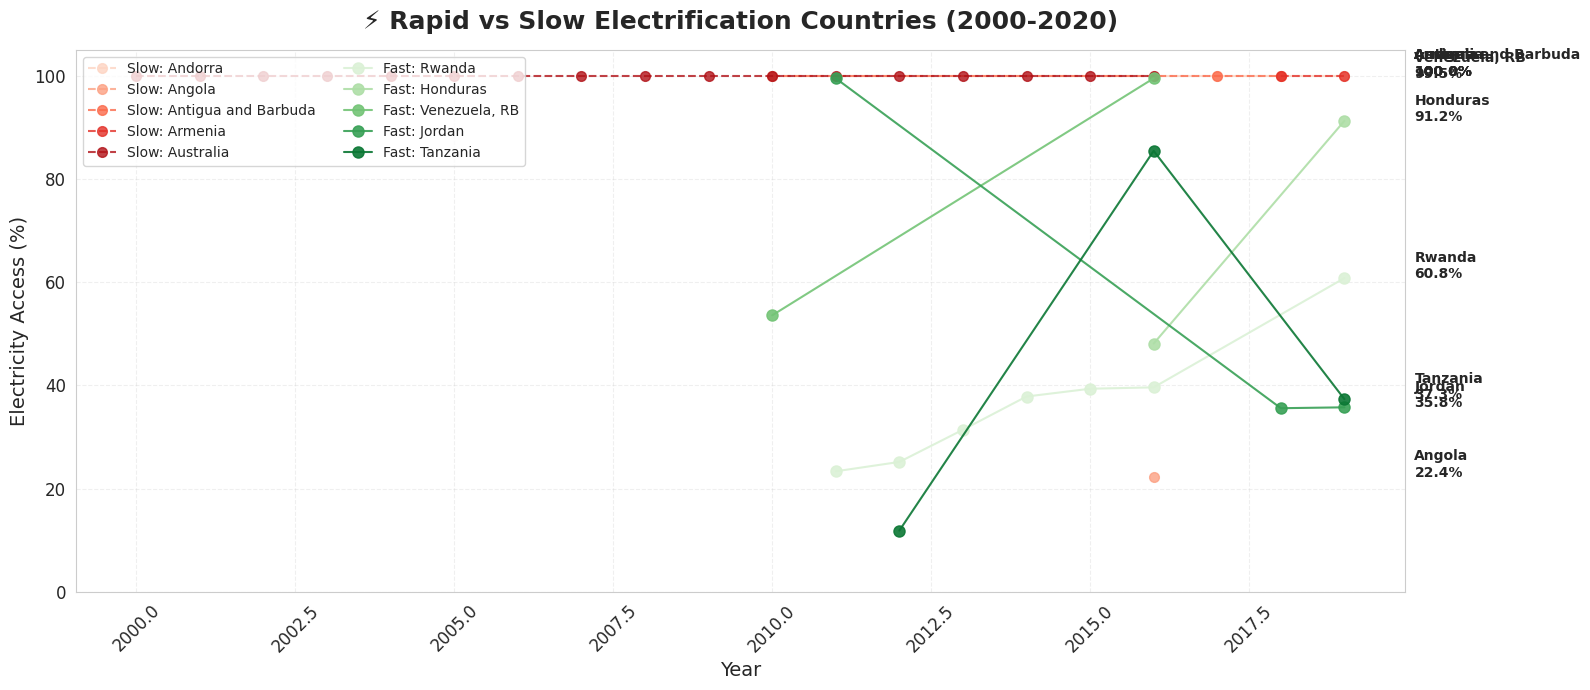

In [12]:
# Compute improvement per country
country_growth = df.groupby('Country_Name')['Electricity_Access_Percent'].agg(lambda x: x.max() - x.min()).sort_values()

fastest = country_growth.tail(5).index
slowest = country_growth.head(5).index

plt.figure(figsize=(16,7))
palette_fast = sns.color_palette("Greens", len(fastest))
palette_slow = sns.color_palette("Reds", len(slowest))

# Slow improvers
for i, country in enumerate(slowest):
    data = df[df['Country_Name']==country]
    plt.plot(
        data['Year'],
        data['Electricity_Access_Percent'],
        linestyle='--', marker='o', markersize=7,
        color=palette_slow[i], alpha=0.8, 
        label=f"Slow: {country}"
    )

# Fast improvers
for i, country in enumerate(fastest):
    data = df[df['Country_Name']==country]
    plt.plot(
        data['Year'],
        data['Electricity_Access_Percent'],
        linestyle='-', marker='o', markersize=8,
        color=palette_fast[i], alpha=0.9,
        label=f"Fast: {country}"
    )

# Annotate final points
for country in fastest.union(slowest):
    final_val = df[df['Country_Name']==country]['Electricity_Access_Percent'].iloc[-1]
    final_year = df['Year'].max()
    plt.text(final_year + 0.1, final_val, f"{country}\n{final_val:.1f}%", fontsize=10, weight='bold')

# Titles and labels
plt.title('⚡ Rapid vs Slow Electrification Countries (2000-2020)', fontsize=18, weight='bold', pad=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Electricity Access (%)', fontsize=14)

# Grid, limits, legend
plt.ylim(0, 105)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='upper left', ncol=2)

plt.tight_layout()
plt.show()

<div style="background-color:#f0f8ff; border-left:6px solid #1e90ff; padding:15px; border-radius:8px;">
  <h2 style="color:#1e90ff; font-family:Arial, sans-serif;">
    <b>3️⃣ Country-Level Patterns</b>
  </h2>
</div>

### **1️⃣ Categorize Countries by Electrification Pattern**

In [13]:
country_stats = df.groupby('Country_Name')['Electricity_Access_Percent'].agg(['min','max','first','last']).reset_index()

# Classification
def classify_country(row):
    if row['first'] >= 95 and row['max']==100:
        return 'Early Achiever'
    elif (row['last'] - row['first']) >= 30:
        return 'Fast Improver'
    elif (row['last'] - row['first']) < 30 and row['last'] < 95:
        return 'Slow Climber'
    elif row['last'] < 50:
        return 'Stagnant/Lagging'
    else:
        return 'Other'

country_stats['Category'] = country_stats.apply(classify_country, axis=1)

### **2️⃣ Count of Countries per Category**

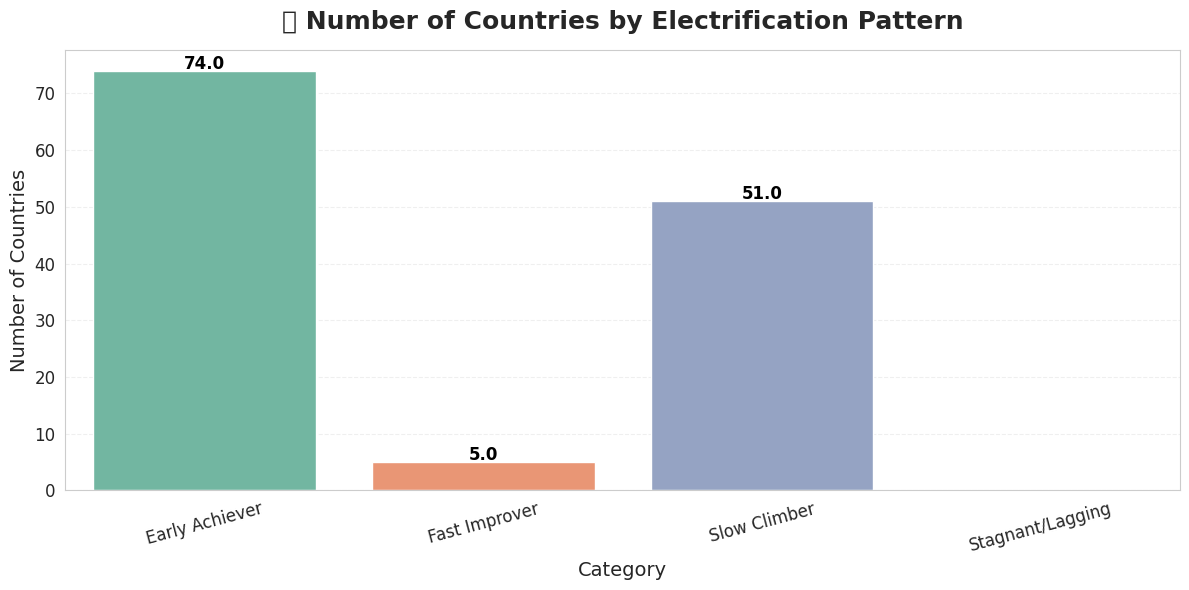

In [14]:
plt.figure(figsize=(12,6))

# Countplot with ordered categories and palette
ax = sns.countplot(
    data=country_stats, 
    x='Category', 
    palette='Set2', 
    order=['Early Achiever','Fast Improver','Slow Climber','Stagnant/Lagging']
)

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height + 0.3),
                ha='center', fontsize=12, weight='bold', color='black')

# Titles and labels
plt.title('🌍 Number of Countries by Electrification Pattern', fontsize=18, weight='bold', pad=15)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)

# Optional grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### **3️⃣ Temporal Line Plots by Category**

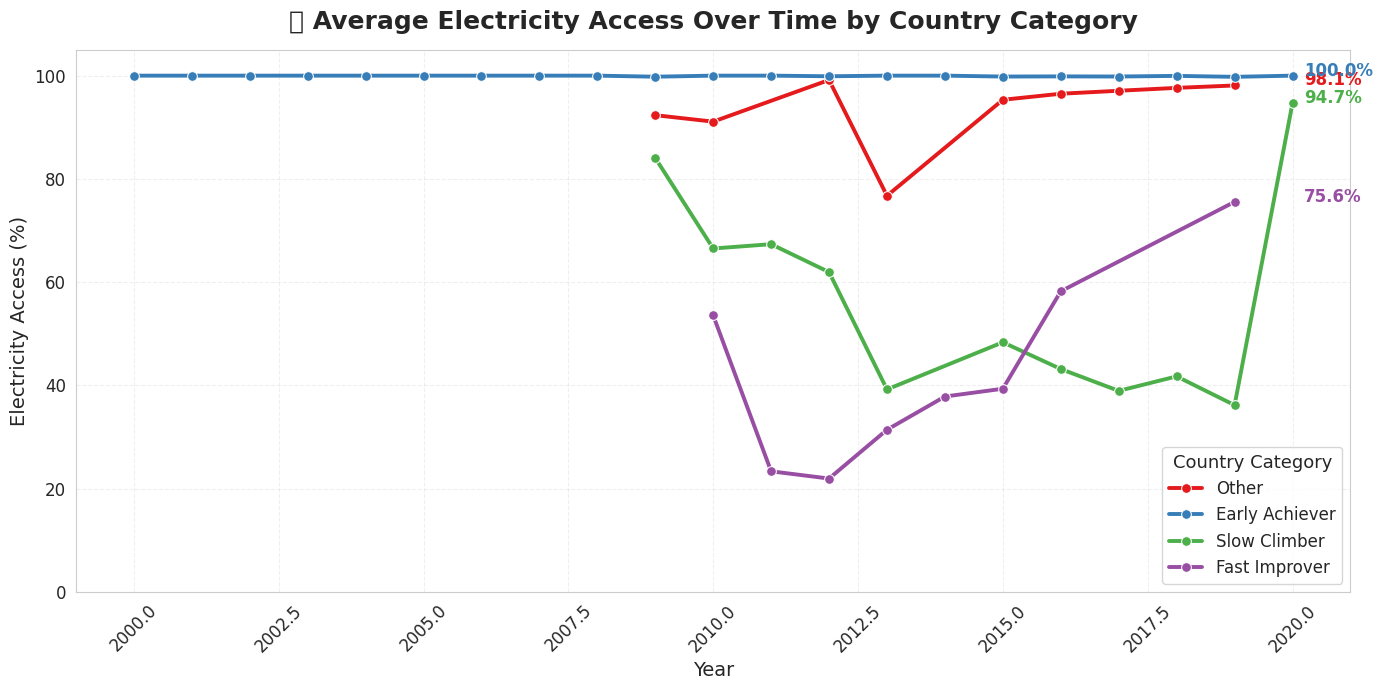

In [15]:
df_cat = df.merge(country_stats[['Country_Name','Category']], on='Country_Name')

plt.figure(figsize=(14,7))

palette = sns.color_palette('Set1', n_colors=df_cat['Category'].nunique())

# Lineplot: mean electricity access by category
sns.lineplot(
    data=df_cat, 
    x='Year', 
    y='Electricity_Access_Percent', 
    hue='Category', 
    estimator='mean', 
    ci=None, 
    palette=palette, 
    linewidth=2.8,
    marker='o',
    markersize=7
)

# Annotate final year value for each category
for i, category in enumerate(df_cat['Category'].unique()):
    final_val = df_cat[df_cat['Category']==category].groupby('Year')['Electricity_Access_Percent'].mean().iloc[-1]
    plt.text(2020.2, final_val, f"{final_val:.1f}%", color=palette[i], weight='bold', fontsize=12)

# Titles and labels
plt.title('🌍 Average Electricity Access Over Time by Country Category', fontsize=18, weight='bold', pad=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Electricity Access (%)', fontsize=14)

# Limits, grid, ticks
plt.ylim(0, 105)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Legend
plt.legend(title='Country Category', fontsize=12, title_fontsize=13, loc='lower right')

plt.tight_layout()
plt.show()

### **4️⃣ Highlight Persistent Low-Access Countries**

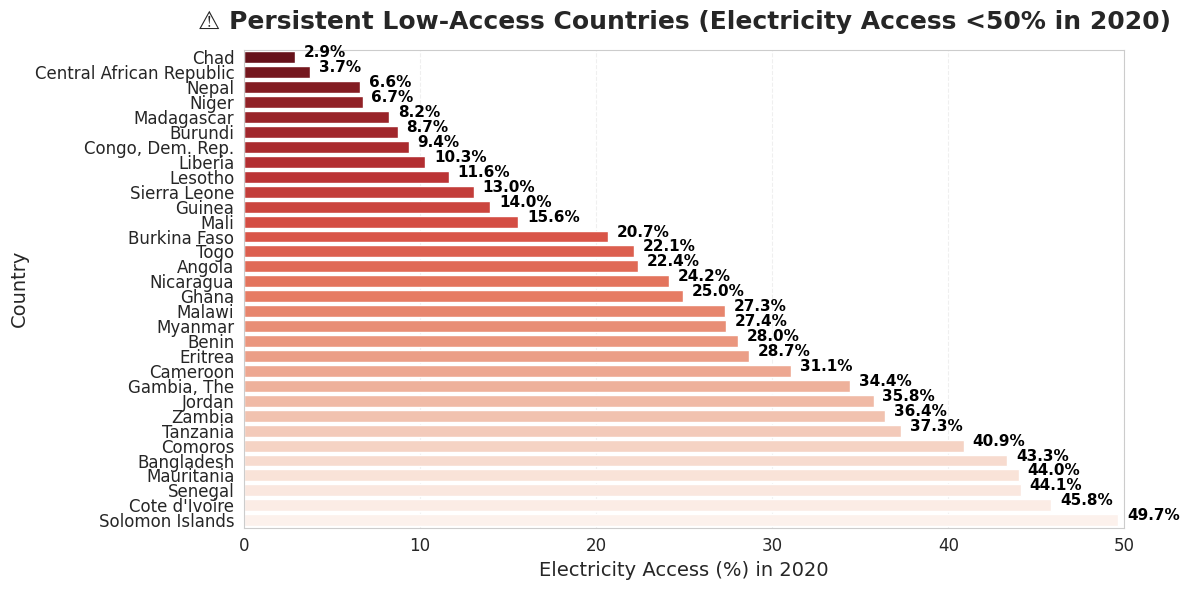

In [16]:
# Get 2020 values for low-access countries and sort
low_access = country_stats[country_stats['last'] < 50]['Country_Name']
low_access_values = df[df['Country_Name'].isin(low_access)].groupby('Country_Name')['Electricity_Access_Percent'].last().sort_values()

plt.figure(figsize=(12,6))

# Barplot
ax = sns.barplot(
    y=low_access_values.index,
    x=low_access_values.values,
    palette='Reds_r'
)

# Add value labels
for i, v in enumerate(low_access_values.values):
    ax.text(v + 0.5, i, f"{v:.1f}%", color='black', weight='bold', fontsize=11)

# Titles and labels
plt.title('⚠️ Persistent Low-Access Countries (Electricity Access <50% in 2020)', fontsize=18, weight='bold', pad=15)
plt.xlabel('Electricity Access (%) in 2020', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Axes limits, ticks, and grid
plt.xlim(0,50)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


<div style="background-color:#f0f8ff; border-left:6px solid #1e90ff; padding:15px; border-radius:8px;">
  <h2 style="color:#1e90ff; font-family:Arial, sans-serif;">
    <b>4️⃣ Inequality & Disparities</b>
  </h2>
</div>

### **1️⃣ Boxplot: Electricity Access by Year**

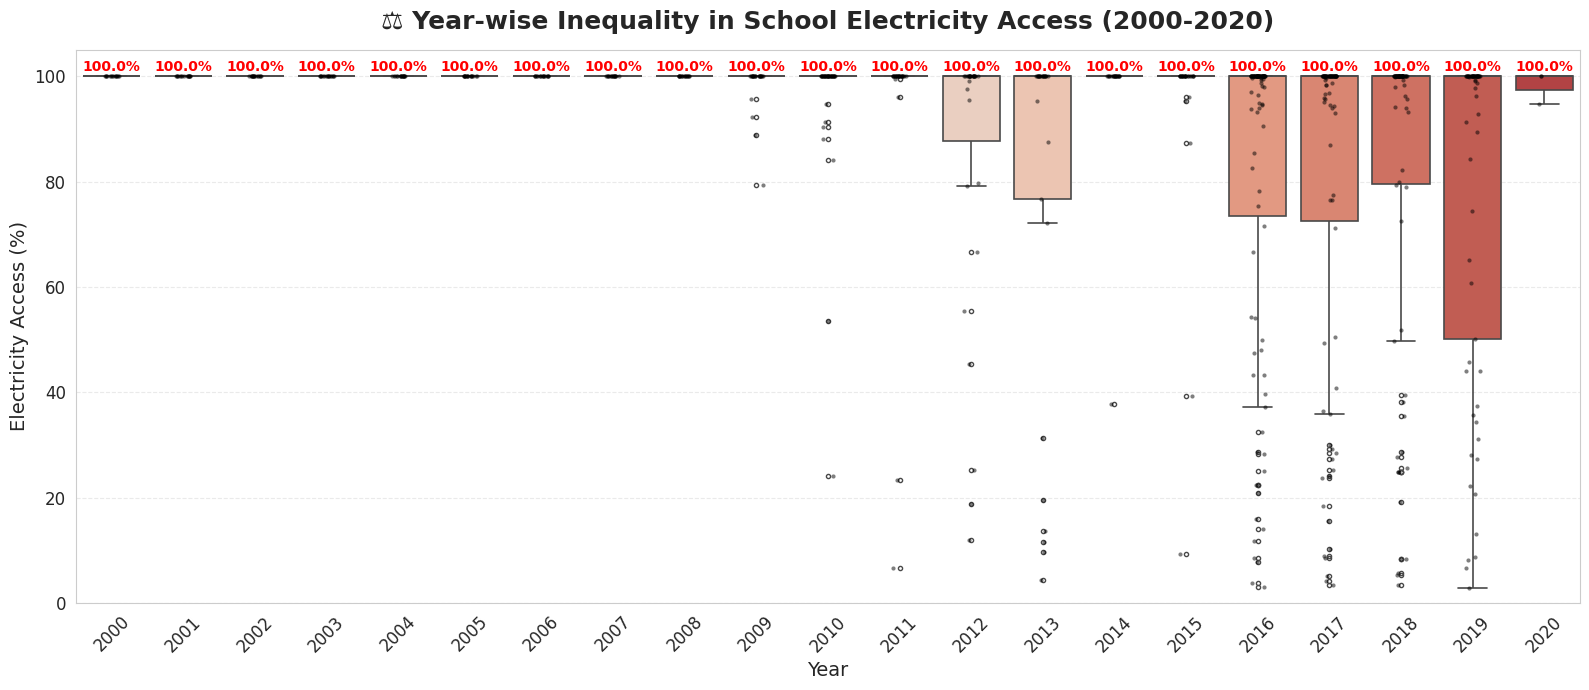

In [17]:
plt.figure(figsize=(16,7))

# Boxplot
sns.boxplot(
    x='Year', 
    y='Electricity_Access_Percent', 
    data=df, 
    palette='coolwarm', 
    fliersize=3, 
    linewidth=1.2
)

# Overlay individual points
sns.stripplot(
    x='Year', 
    y='Electricity_Access_Percent', 
    data=df, 
    color='black', 
    size=3, 
    jitter=True, 
    alpha=0.5
)

# Highlight median for each year
medians = df.groupby('Year')['Electricity_Access_Percent'].median()
for i, median in enumerate(medians):
    plt.text(i, median + 1, f'{median:.1f}%', ha='center', color='red', weight='bold')

# Titles and labels
plt.title('⚖️ Year-wise Inequality in School Electricity Access (2000-2020)', fontsize=18, weight='bold', pad=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Electricity Access (%)', fontsize=14)

# Ticks and grid
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

### **2️⃣ Top vs Bottom Countries (2020)**

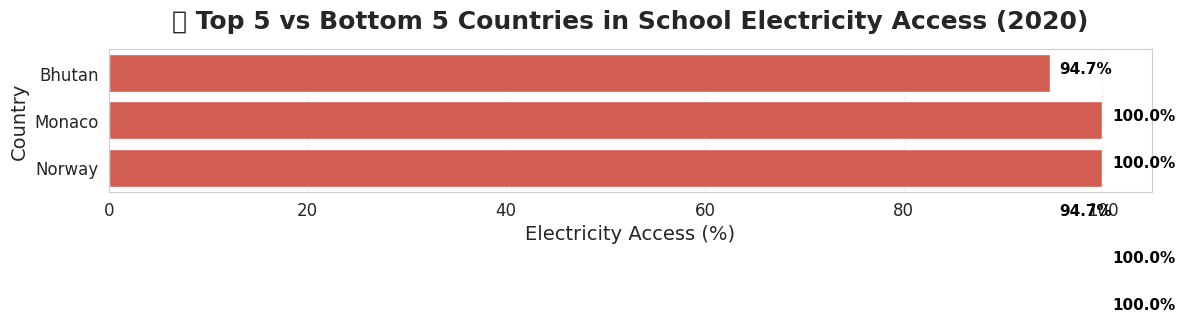

In [18]:
# Get 2020 data
df_2020 = df[df['Year']==2020].sort_values('Electricity_Access_Percent')

# Top 5 & Bottom 5 countries
top5 = df_2020.tail(5)
bottom5 = df_2020.head(5)
extremes = pd.concat([bottom5, top5])

plt.figure(figsize=(12,6))

# Barplot with contrasting palette
palette = ['#e74c3c']*5 + ['#27ae60']*5  # red for bottom, green for top
ax = sns.barplot(
    x='Electricity_Access_Percent', 
    y='Country_Name', 
    data=extremes, 
    palette=palette
)

# Add value labels
for i, v in enumerate(extremes['Electricity_Access_Percent']):
    ax.text(v + 1, i, f"{v:.1f}%", color='black', weight='bold', fontsize=11)

# Titles and labels
plt.title('🏆 Top 5 vs Bottom 5 Countries in School Electricity Access (2020)', fontsize=18, weight='bold', pad=15)
plt.xlabel('Electricity Access (%)', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Axes limits, ticks, grid
plt.xlim(0, 105)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### **3️⃣ Standard Deviation Over Time**

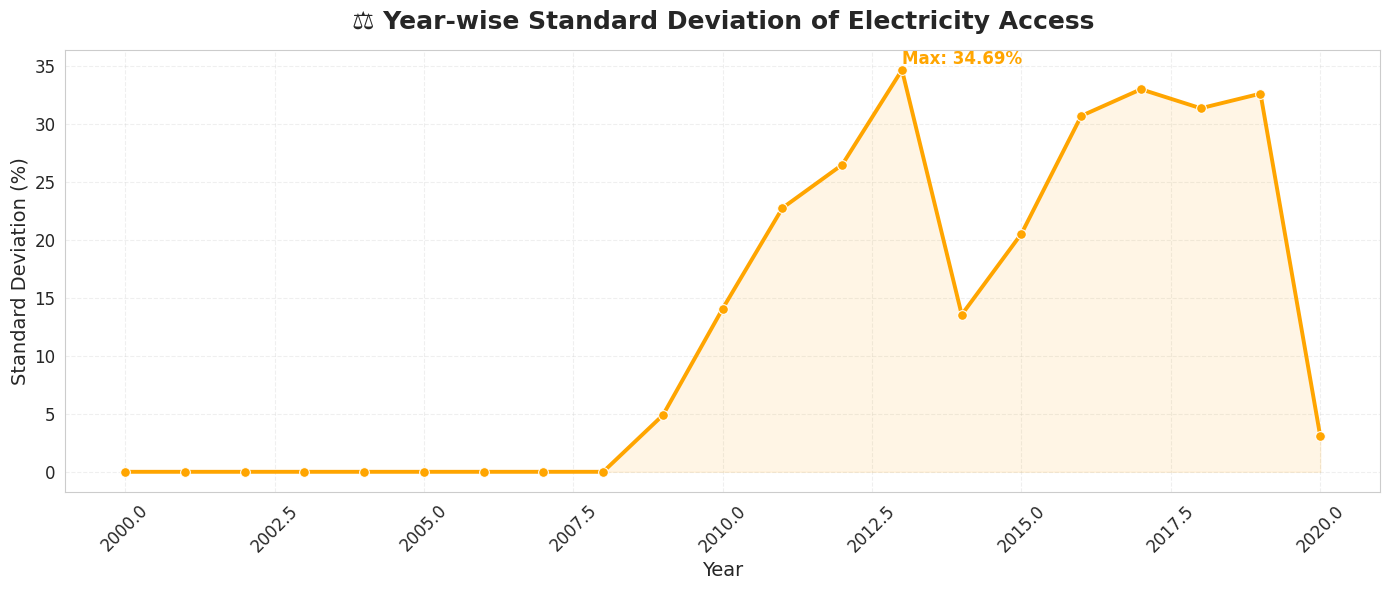

In [19]:
std_yearly = df.groupby('Year')['Electricity_Access_Percent'].std().reset_index()

plt.figure(figsize=(14,6))

# Line with markers
sns.lineplot(
    data=std_yearly, 
    x='Year', 
    y='Electricity_Access_Percent', 
    marker='o', 
    color='orange', 
    linewidth=2.8, 
    markersize=7
)

# Shade under the curve
plt.fill_between(std_yearly['Year'], std_yearly['Electricity_Access_Percent'], color='orange', alpha=0.1)

# Annotate max std
max_std = std_yearly['Electricity_Access_Percent'].max()
max_year = std_yearly.loc[std_yearly['Electricity_Access_Percent'].idxmax(), 'Year']
plt.text(max_year, max_std + 0.5, f"Max: {max_std:.2f}%", color='orange', weight='bold', fontsize=12)

# Titles and labels
plt.title('⚖️ Year-wise Standard Deviation of Electricity Access', fontsize=18, weight='bold', pad=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Standard Deviation (%)', fontsize=14)

# Grid and ticks
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### **4️⃣ Density Plot: Distribution of Access**

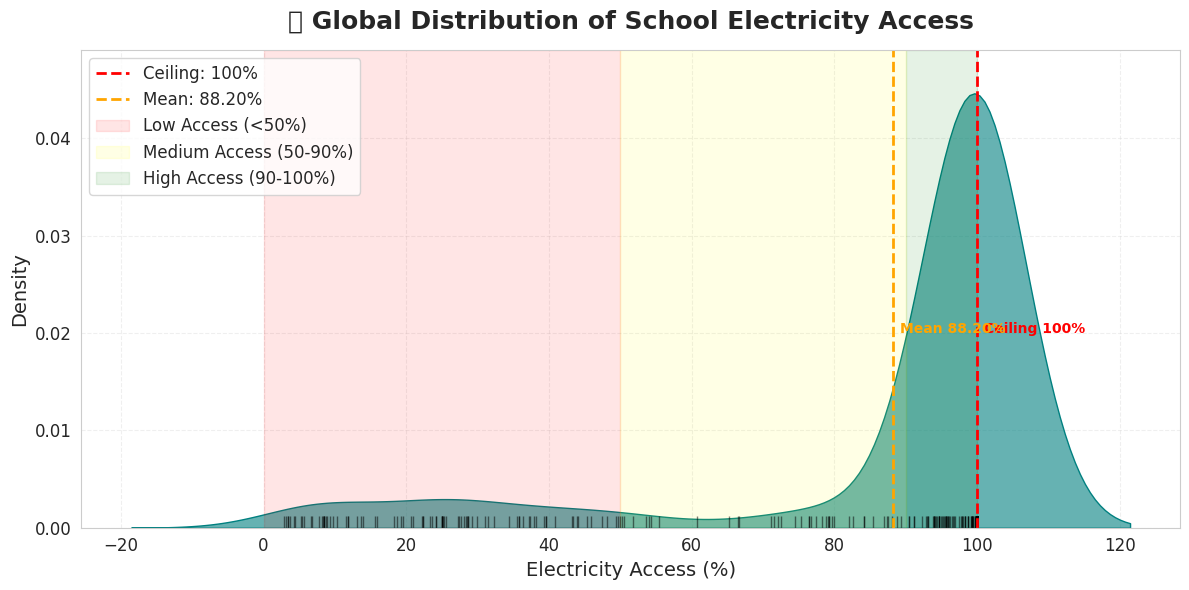

In [20]:
plt.figure(figsize=(12,6))

# KDE plot
sns.kdeplot(
    df['Electricity_Access_Percent'], 
    fill=True, 
    color='teal', 
    alpha=0.6
)

# Rugplot for individual observations
sns.rugplot(df['Electricity_Access_Percent'], color='black', alpha=0.5)

# Vertical lines: mean and ceiling
mean_val = df['Electricity_Access_Percent'].mean()
plt.axvline(100, color='red', linestyle='--', linewidth=2, label='Ceiling: 100%')
plt.axvline(mean_val, color='orange', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}%')

# Annotate vertical lines
plt.text(100 + 1, 0.02, 'Ceiling 100%', color='red', weight='bold')
plt.text(mean_val + 1, 0.02, f'Mean {mean_val:.2f}%', color='orange', weight='bold')

# Optional shaded regions
plt.axvspan(0, 50, color='red', alpha=0.1, label='Low Access (<50%)')
plt.axvspan(50, 90, color='yellow', alpha=0.1, label='Medium Access (50-90%)')
plt.axvspan(90, 100, color='green', alpha=0.1, label='High Access (90-100%)')

# Titles and labels
plt.title('🌍 Global Distribution of School Electricity Access', fontsize=18, weight='bold', pad=15)
plt.xlabel('Electricity Access (%)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Grid and legend
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

<div style="background-color:#f0f8ff; border-left:6px solid #1e90ff; padding:15px; border-radius:8px;">
  <h2 style="color:#1e90ff; font-family:Arial, sans-serif;">
    <b>5️⃣ Policy & Development Insights</b>
  </h2>
</div>

### **1️⃣ Countries That Maintained 100% Access**

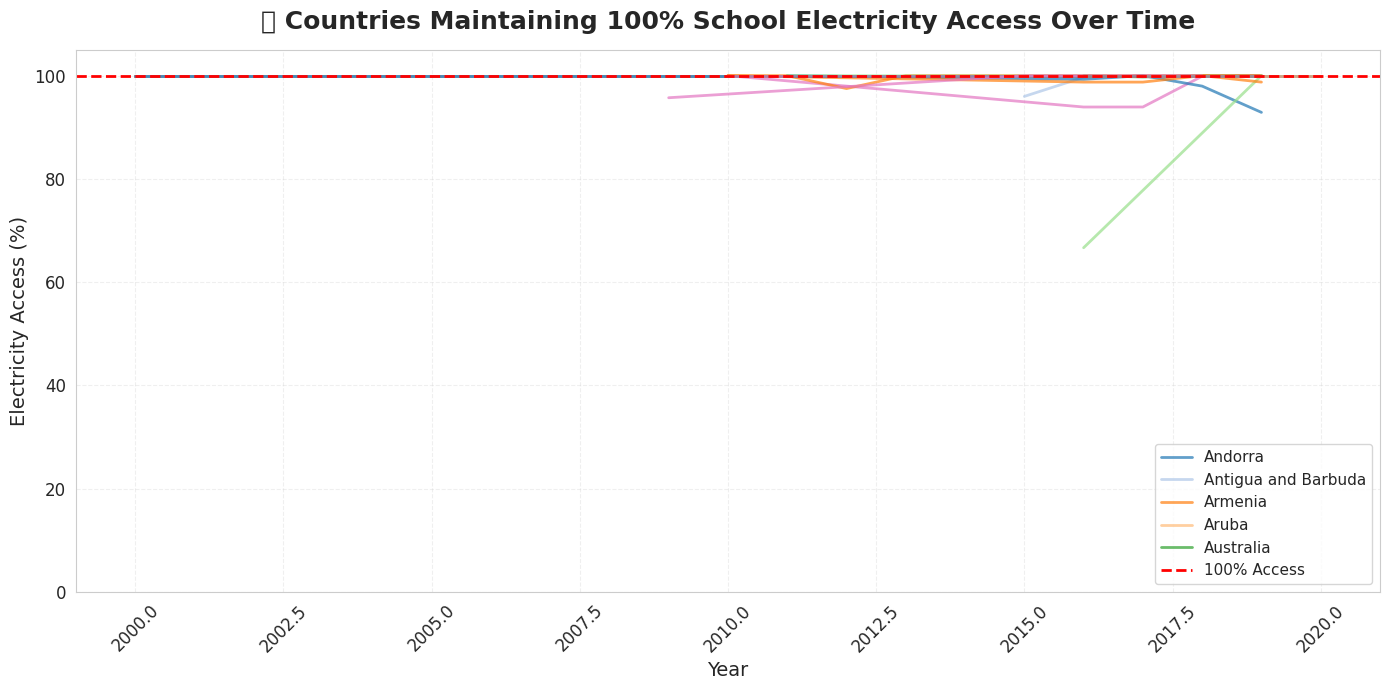

In [21]:
countries_100 = country_stats[country_stats['max']==100]['Country_Name']

plt.figure(figsize=(14,7))

# Color palette for all countries
palette = sns.color_palette("tab20", n_colors=len(countries_100))

# Plot each country
for i, country in enumerate(countries_100):
    country_data = df[df['Country_Name']==country]
    plt.plot(
        country_data['Year'], 
        country_data['Electricity_Access_Percent'], 
        color=palette[i], 
        alpha=0.7, 
        linewidth=2,
        label=country if i < 5 else ""  # label only first 5 to avoid clutter
    )

# Horizontal line at 100%
plt.axhline(100, color='red', linestyle='--', linewidth=2, label='100% Access')

# Titles and labels
plt.title('🌟 Countries Maintaining 100% School Electricity Access Over Time', fontsize=18, weight='bold', pad=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Electricity Access (%)', fontsize=14)

# Grid and limits
plt.ylim(0, 105)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Legend
plt.legend(fontsize=11, loc='lower right')

plt.tight_layout()
plt.show()

### **2️⃣ Low-Access Countries Highlight (2020)**

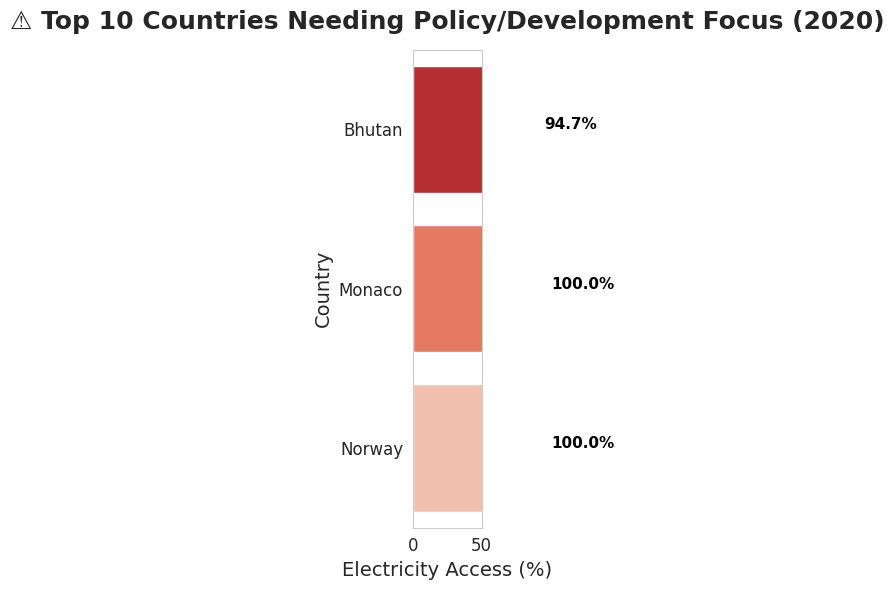

In [22]:
# Top 10 low-access countries in 2020
low_access_2020 = df[df['Year']==2020].sort_values('Electricity_Access_Percent').head(10)

plt.figure(figsize=(12,6))

# Barplot with gradient palette
ax = sns.barplot(
    x='Electricity_Access_Percent', 
    y='Country_Name', 
    data=low_access_2020, 
    palette='Reds_r'
)

# Add value labels
for i, v in enumerate(low_access_2020['Electricity_Access_Percent']):
    ax.text(v + 0.5, i, f"{v:.1f}%", color='black', weight='bold', fontsize=11)

# Titles and labels
plt.title('⚠️ Top 10 Countries Needing Policy/Development Focus (2020)', fontsize=18, weight='bold', pad=15)
plt.xlabel('Electricity Access (%)', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Axes limits, ticks, grid
plt.xlim(0,50)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### **3️⃣ Scatter Plot: Year of First 100% Access vs GDP or Development Proxy**

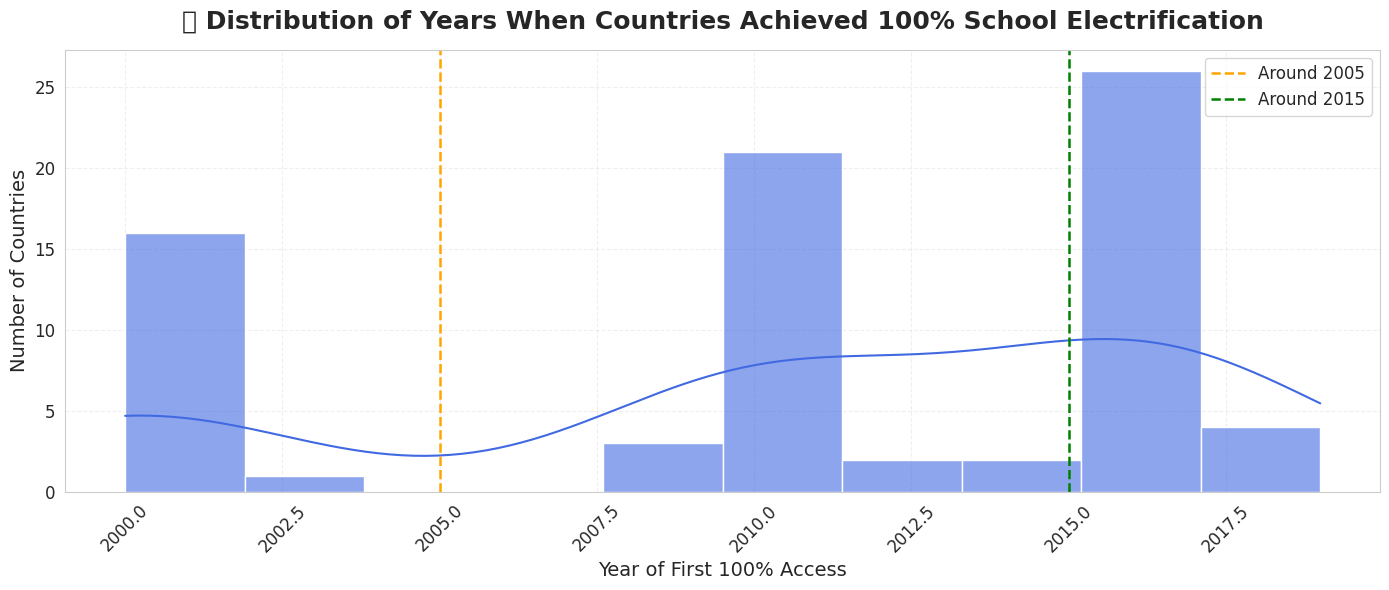

In [23]:
# Year when each country first reached 100%
df_100 = df[df['Electricity_Access_Percent']==100].groupby('Country_Name')['Year'].min().reset_index()
df_100.columns = ['Country_Name','Year_First_100']

plt.figure(figsize=(14,6))

# Histogram with KDE
sns.histplot(
    df_100['Year_First_100'], 
    bins=10, 
    color='royalblue', 
    kde=True, 
    alpha=0.6
)

# Optional: vertical lines to highlight decades
plt.axvline(2005, color='orange', linestyle='--', linewidth=1.8, label='Around 2005')
plt.axvline(2015, color='green', linestyle='--', linewidth=1.8, label='Around 2015')

# Titles and labels
plt.title('🏫 Distribution of Years When Countries Achieved 100% School Electrification', fontsize=18, weight='bold', pad=15)
plt.xlabel('Year of First 100% Access', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)

# Grid, ticks, and legend
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

### **4️⃣ Cumulative Progress Plot (Policy Success Story)**

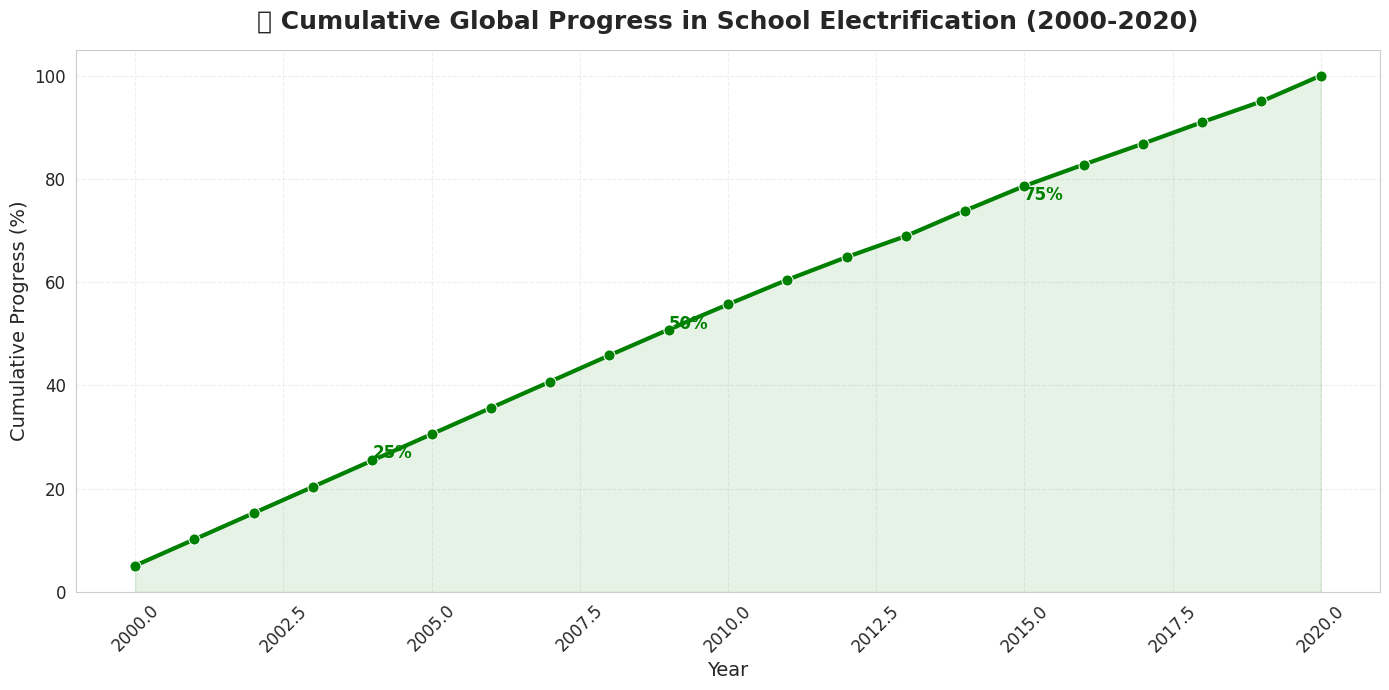

In [24]:
df_yearly = df.groupby('Year')['Electricity_Access_Percent'].mean().reset_index()
df_yearly['Cumulative_Progress'] = df_yearly['Electricity_Access_Percent'].cumsum() / df_yearly['Electricity_Access_Percent'].sum() * 100

plt.figure(figsize=(14,7))

# Lineplot with markers
sns.lineplot(
    data=df_yearly, 
    x='Year', 
    y='Cumulative_Progress', 
    marker='o', 
    color='green', 
    linewidth=3, 
    markersize=8
)

# Shade area under curve
plt.fill_between(df_yearly['Year'], df_yearly['Cumulative_Progress'], color='green', alpha=0.1)

# Annotate key milestones safely
for milestone in [25,50,75,100]:
    milestone_rows = df_yearly[df_yearly['Cumulative_Progress'] >= milestone]
    if not milestone_rows.empty:
        year_idx = milestone_rows['Year'].iloc[0]
        plt.text(year_idx, milestone+1, f"{milestone}%", color='green', weight='bold', fontsize=12)

# Titles and labels
plt.title('🌱 Cumulative Global Progress in School Electrification (2000-2020)', fontsize=18, weight='bold', pad=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Progress (%)', fontsize=14)

# Grid and limits
plt.ylim(0,105)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

<div style="background-color:#f0f8ff; border-left:6px solid #1e90ff; padding:15px; border-radius:8px;">
  <h2 style="color:#1e90ff; font-family:Arial, sans-serif;">
    <b>6️⃣ Advanced Observations</b>
  </h2>
</div>

### **1️⃣ Identify Countries Plateauing at 95–99%**

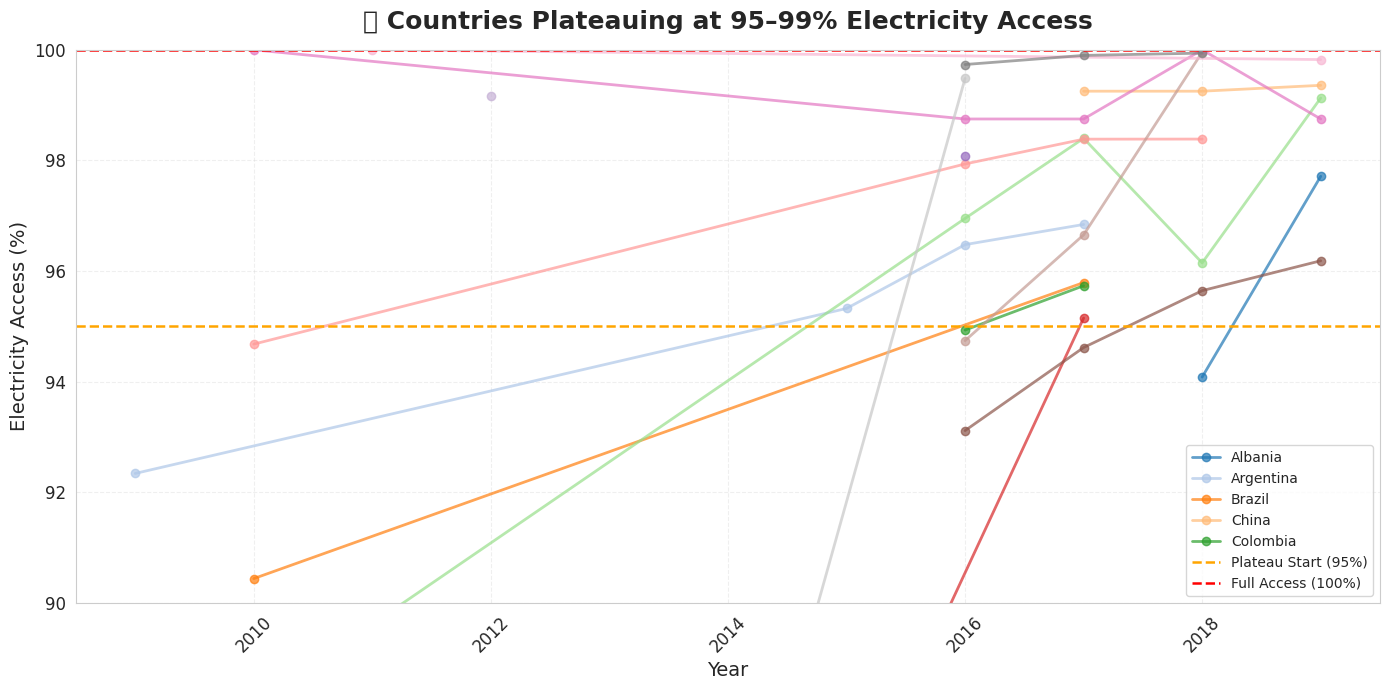

In [25]:
plateau_countries = country_stats[(country_stats['last'] >= 95) & (country_stats['last'] < 100)]['Country_Name']

plt.figure(figsize=(14,7))

# Color palette
palette = sns.color_palette("tab20", n_colors=len(plateau_countries))

# Plot each country
for i, country in enumerate(plateau_countries):
    country_data = df[df['Country_Name']==country]
    plt.plot(
        country_data['Year'],
        country_data['Electricity_Access_Percent'],
        marker='o',
        markersize=6,
        linewidth=2,
        alpha=0.7,
        color=palette[i],
        label=country if i < 5 else ""  # label only first 5 to reduce clutter
    )

# Horizontal lines for reference
plt.axhline(95, color='orange', linestyle='--', linewidth=1.8, label='Plateau Start (95%)')
plt.axhline(100, color='red', linestyle='--', linewidth=1.8, label='Full Access (100%)')

# Titles and labels
plt.title('📈 Countries Plateauing at 95–99% Electricity Access', fontsize=18, weight='bold', pad=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Electricity Access (%)', fontsize=14)

# Grid, limits, ticks
plt.ylim(90, 100)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Legend
plt.legend(fontsize=10, loc='lower right')

plt.tight_layout()
plt.show()

### **2️⃣ Countries with High Volatility (<50%)**

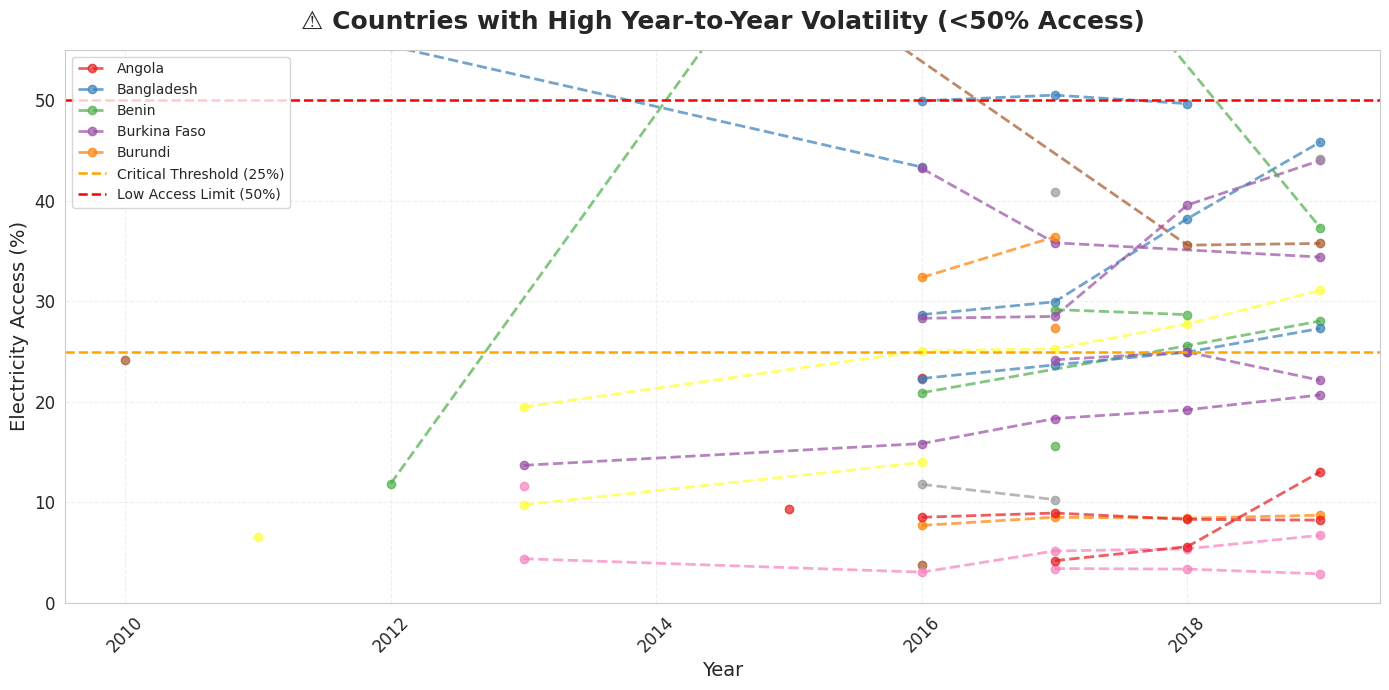

In [26]:
volatile_countries = country_stats[country_stats['last'] < 50]['Country_Name']

plt.figure(figsize=(14,7))

# Color palette
palette = sns.color_palette("Set1", n_colors=len(volatile_countries))

# Plot each country
for i, country in enumerate(volatile_countries):
    country_data = df[df['Country_Name']==country]
    plt.plot(
        country_data['Year'],
        country_data['Electricity_Access_Percent'],
        marker='o',
        markersize=6,
        linestyle='--',
        linewidth=2,
        alpha=0.7,
        color=palette[i],
        label=country if i < 5 else ""  # label only first 5 to reduce clutter
    )

# Horizontal reference lines
plt.axhline(25, color='orange', linestyle='--', linewidth=1.8, label='Critical Threshold (25%)')
plt.axhline(50, color='red', linestyle='--', linewidth=1.8, label='Low Access Limit (50%)')

# Titles and labels
plt.title('⚠️ Countries with High Year-to-Year Volatility (<50% Access)', fontsize=18, weight='bold', pad=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Electricity Access (%)', fontsize=14)

# Grid, limits, ticks
plt.ylim(0, 55)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Legend
plt.legend(fontsize=10, loc='upper left')

plt.tight_layout()
plt.show()

### **3️⃣ Distribution of Max, Min, and Last Access**

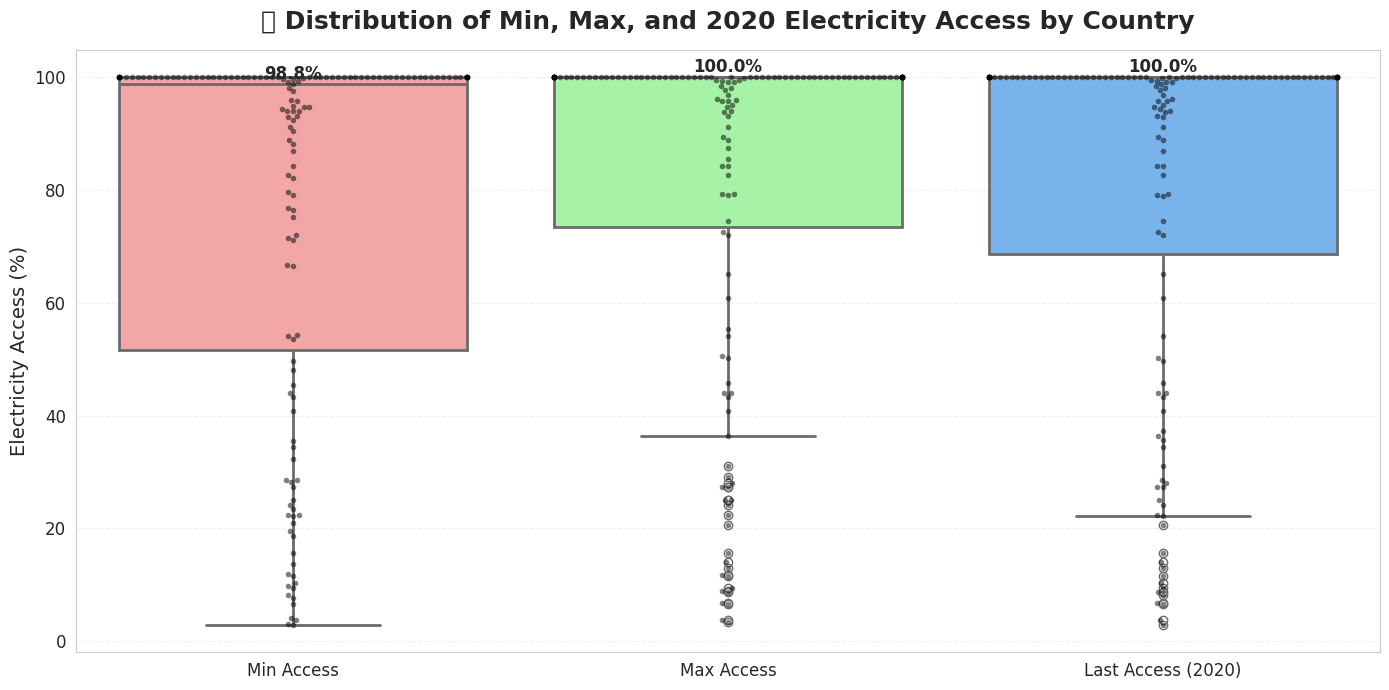

In [27]:
plt.figure(figsize=(14,7))

# Prepare data
data = pd.DataFrame({
    'Min Access': country_stats['min'],
    'Max Access': country_stats['max'],
    'Last Access (2020)': country_stats['last']
})

# Boxplot with palette
ax = sns.boxplot(data=data, palette=['#ff9999','#99ff99','#66b3ff'], linewidth=2)

# Optional: overlay individual points
sns.swarmplot(data=data, color='black', alpha=0.5, size=4)

# Annotate medians
for i, col in enumerate(data.columns):
    median_val = data[col].median()
    ax.text(i, median_val + 1, f'{median_val:.1f}%', horizontalalignment='center', weight='bold', fontsize=12)

# Titles and labels
plt.title('📊 Distribution of Min, Max, and 2020 Electricity Access by Country', fontsize=18, weight='bold', pad=15)
plt.ylabel('Electricity Access (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### **4️⃣ Heatmap of Year-to-Year Changes**

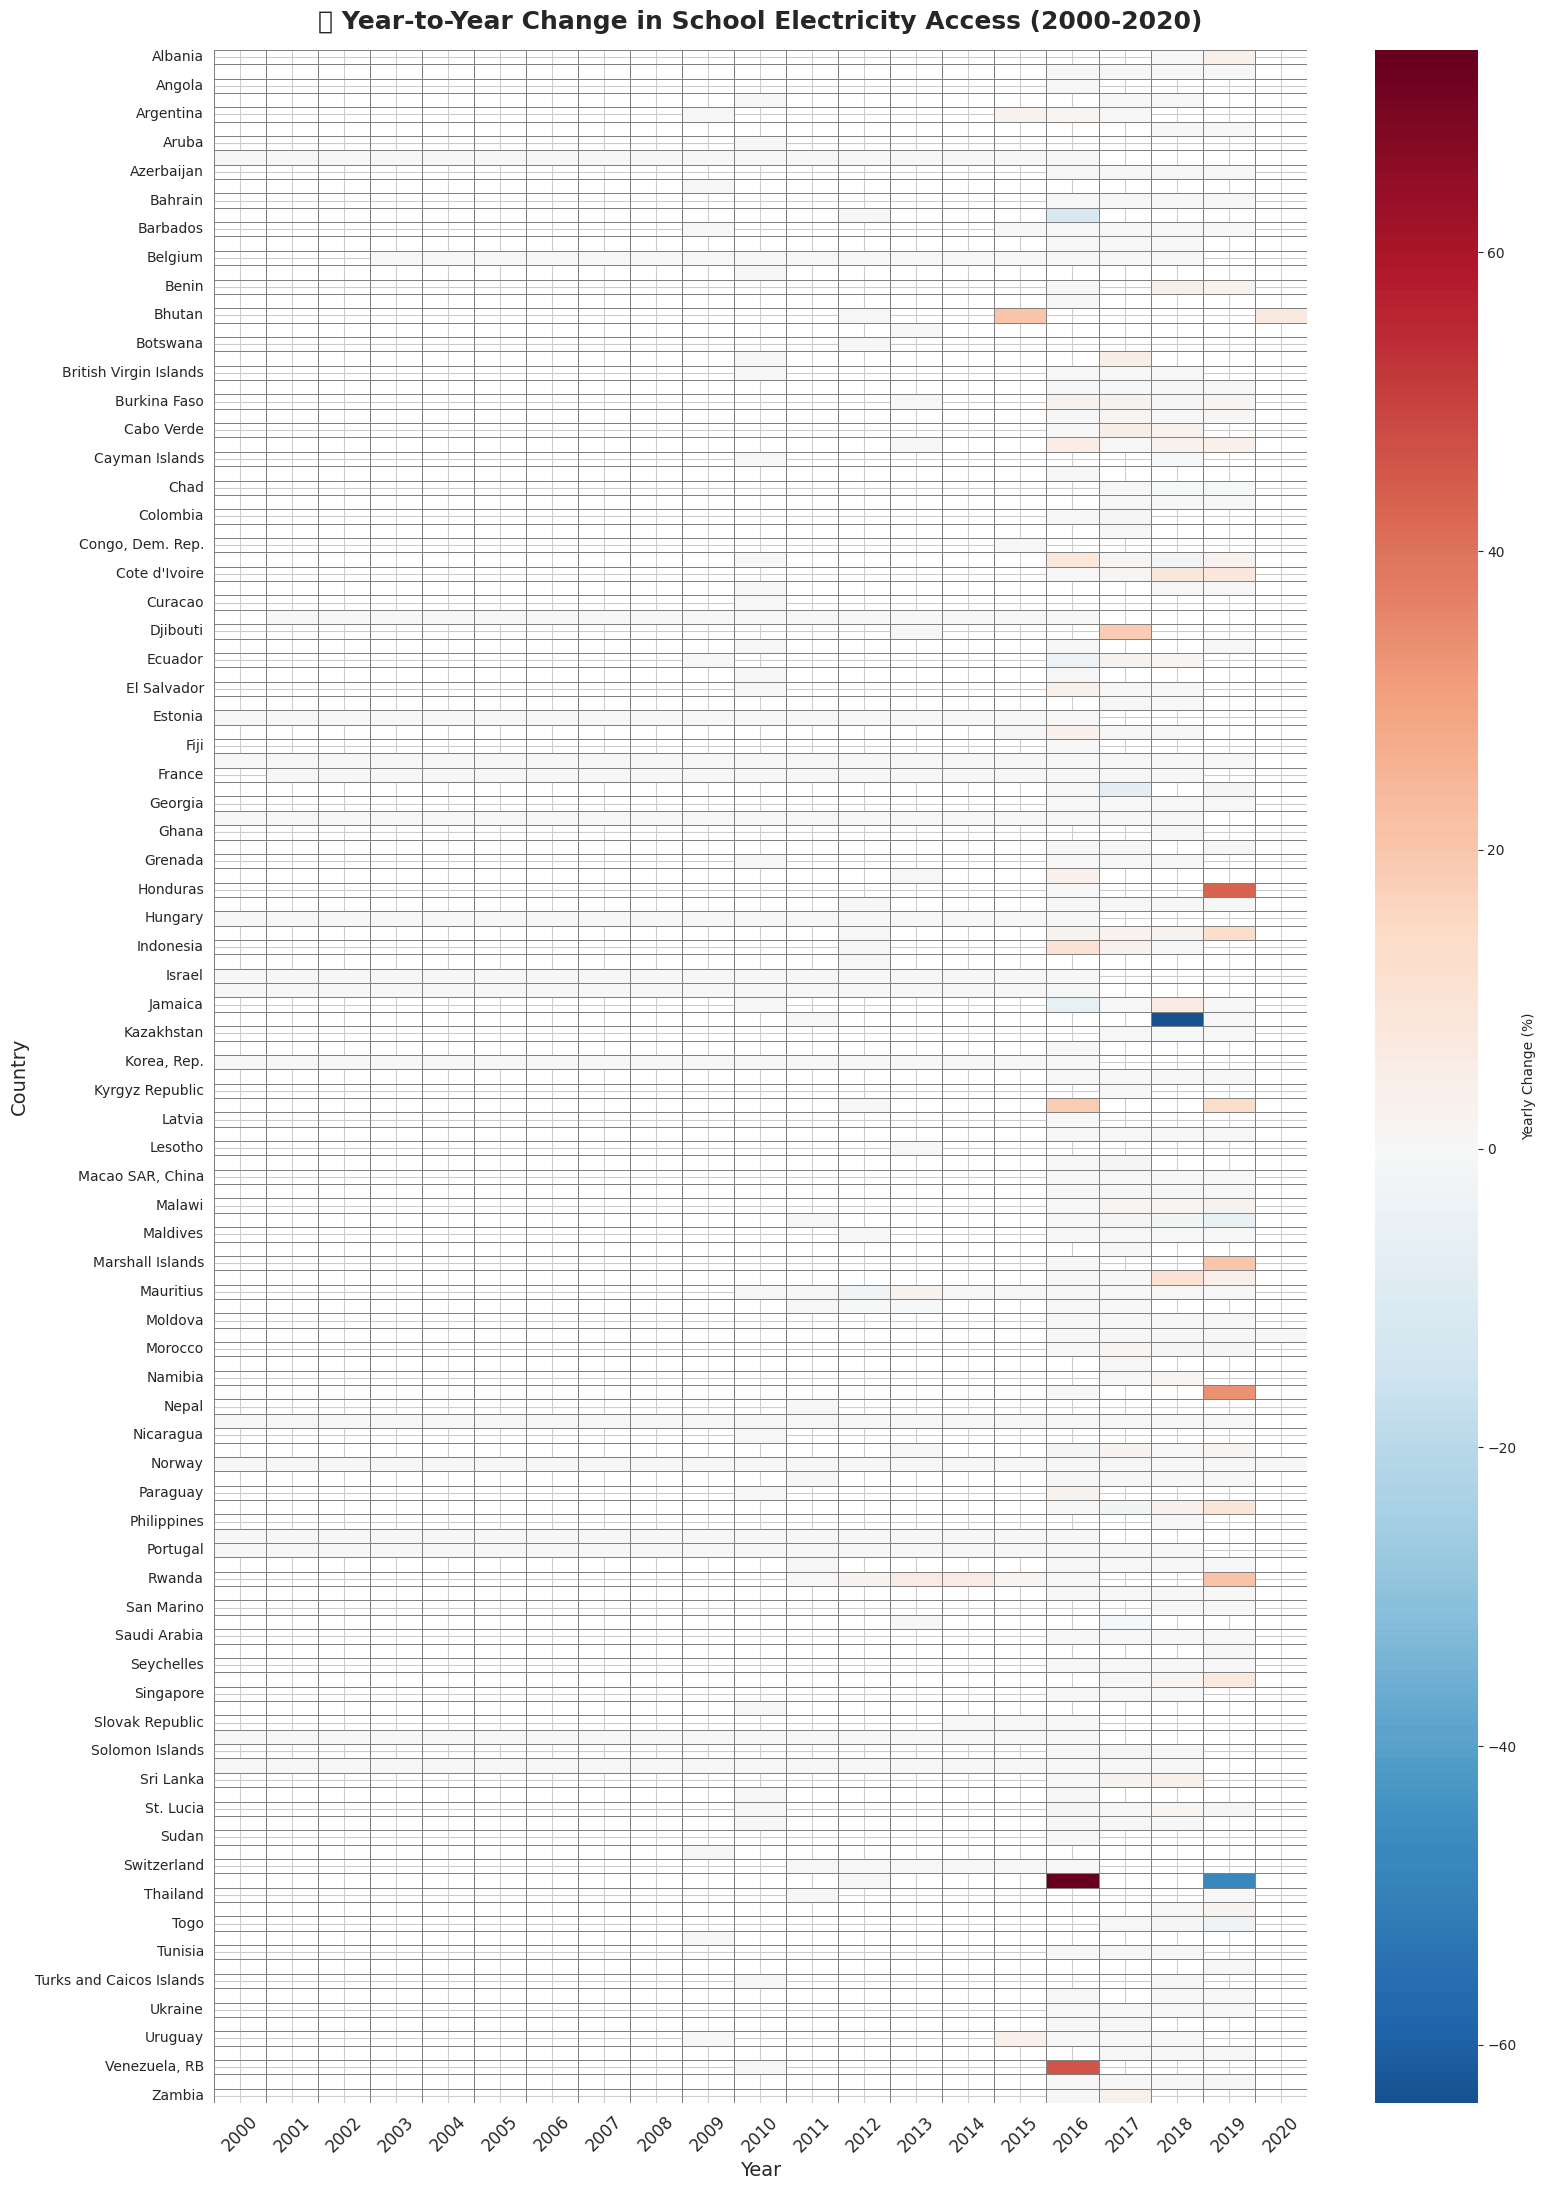

In [28]:
# Compute year-to-year change
df_sorted = df.sort_values(['Country_Name','Year'])
df_sorted['Yearly_Change'] = df_sorted.groupby('Country_Name')['Electricity_Access_Percent'].diff().fillna(0)

# Pivot for heatmap
heatmap_df = df_sorted.pivot(index='Country_Name', columns='Year', values='Yearly_Change')

plt.figure(figsize=(16,22))

sns.heatmap(
    heatmap_df, 
    cmap='RdBu_r', 
    center=0, 
    linewidths=0.5, 
    linecolor='gray', 
    cbar_kws={'label': 'Yearly Change (%)'},
    annot=False  # Set True if you want numbers on cells (not recommended for large DF)
)

# Titles and labels
plt.title('📈 Year-to-Year Change in School Electricity Access (2000-2020)', fontsize=18, weight='bold', pad=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Tick styling
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

<div style="background-color:#f0f8ff; border-left:6px solid #1e90ff; padding:15px; border-radius:8px;">
  <h2 style="color:#1e90ff; font-family:Arial, sans-serif;">
     <b>Thank You</b>
  </h2>
  <p style="font-size:14px; color:#333333; font-family:Verdana, sans-serif;">
    Thank you for going through this analysis of <b>Global School Electricity Access (2000-2020)</b>.  
    I hope this notebook provided valuable insights into global trends, disparities, and policy implications.  
    Your feedback, suggestions, or discussions are most welcome to further improve and refine this analysis.  
    🌟 Happy Learning and Exploring Data!  
  </p>
</div>